# **Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
!pip install optuna factor-analyzer hdbscan -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import warnings
import hdbscan
import scipy.cluster.hierarchy as shc
import plotly.graph_objects as go
import umap

from sklearn.manifold import trustworthiness
from google.colab import drive
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN, OPTICS

drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Memuat Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /Dataset/Airline Passenger.csv")

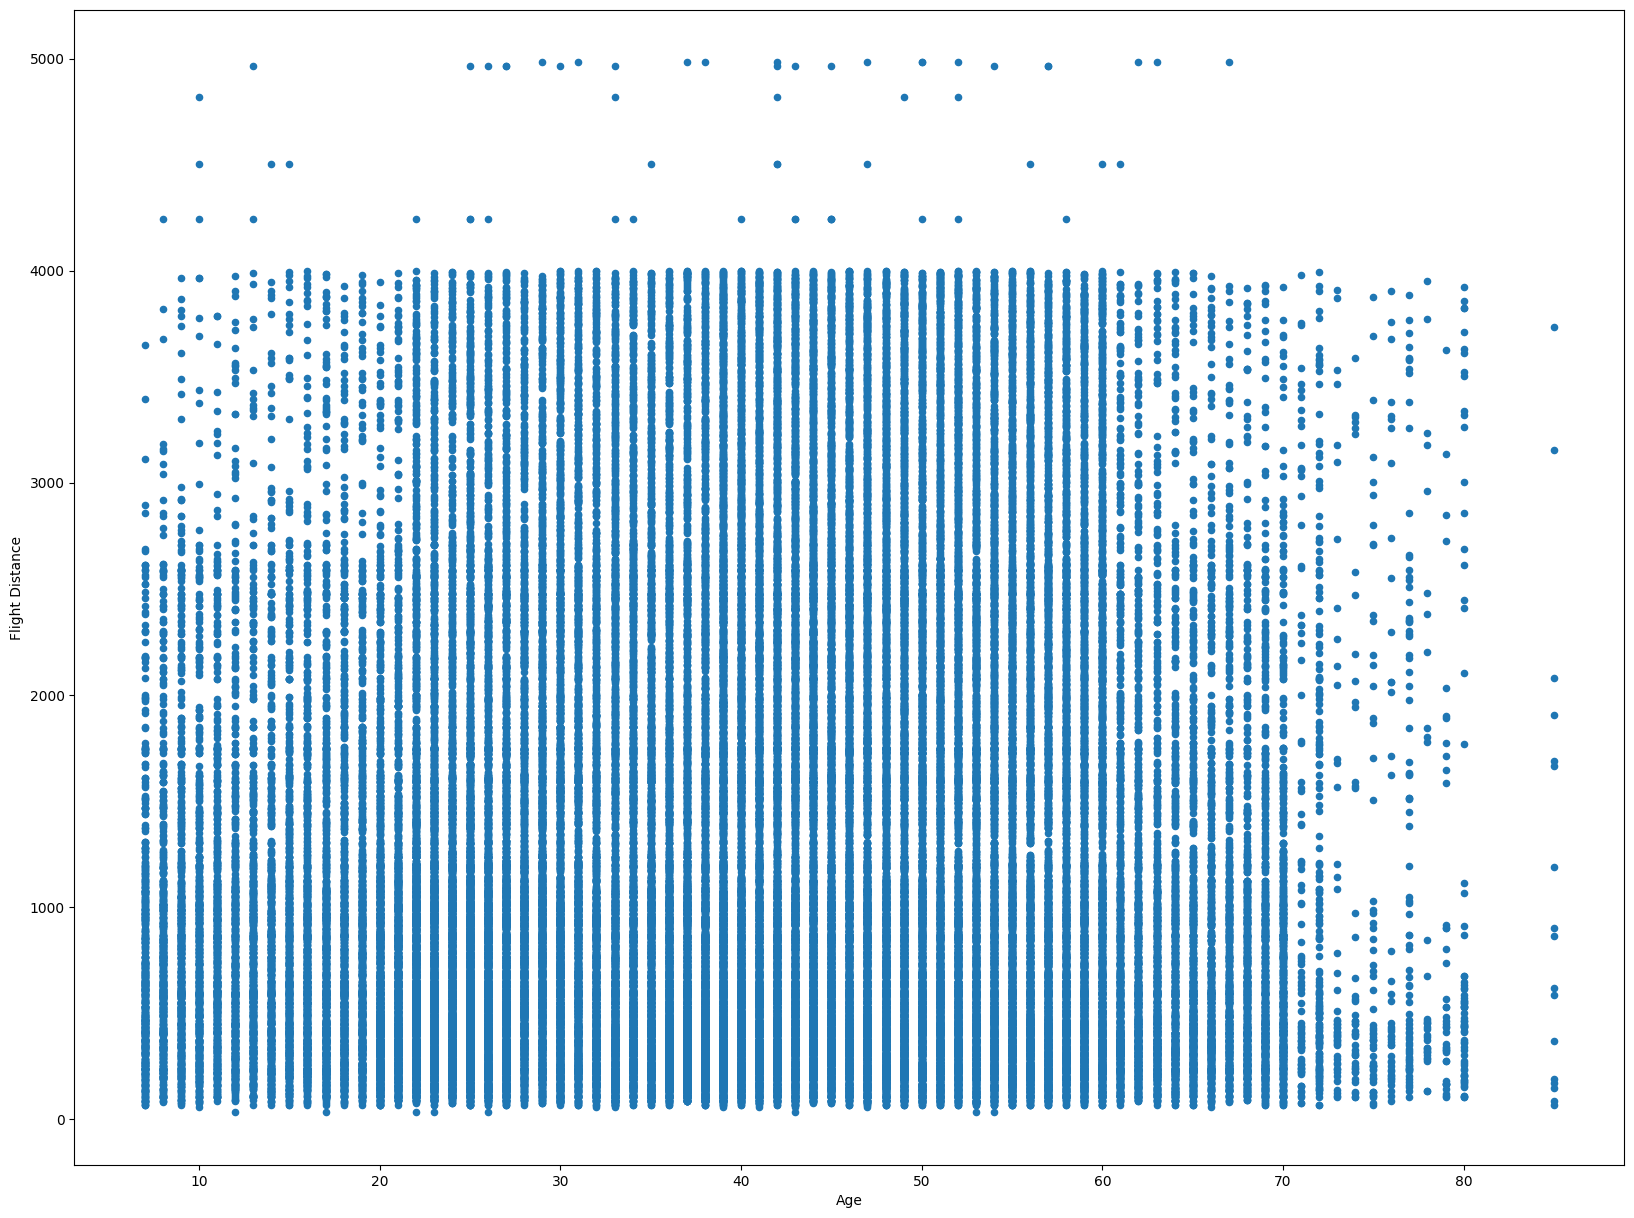

In [ ]:
df.plot(kind='scatter', x="Age",y="Flight Distance",figsize=(20,15))

plt.show()

In [ ]:
df.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Seat comfort  Inflight entertainment  \
0                       3  ...             5                       5   
1                       3  ...             1                       1   
2                       2  ...             5                       5   
3                       5  ...             2                       2   
4                       3  ...             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  
0                      18.0  
1                       6.0  
2                       0.0  
3                       9.0  
4                       0.0  

[5 rows x 23 columns]

# **Exploratory Data Analysis (EDA)**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [ ]:
df.drop('id', axis=1,inplace=True)

In [ ]:
df.describe()

Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

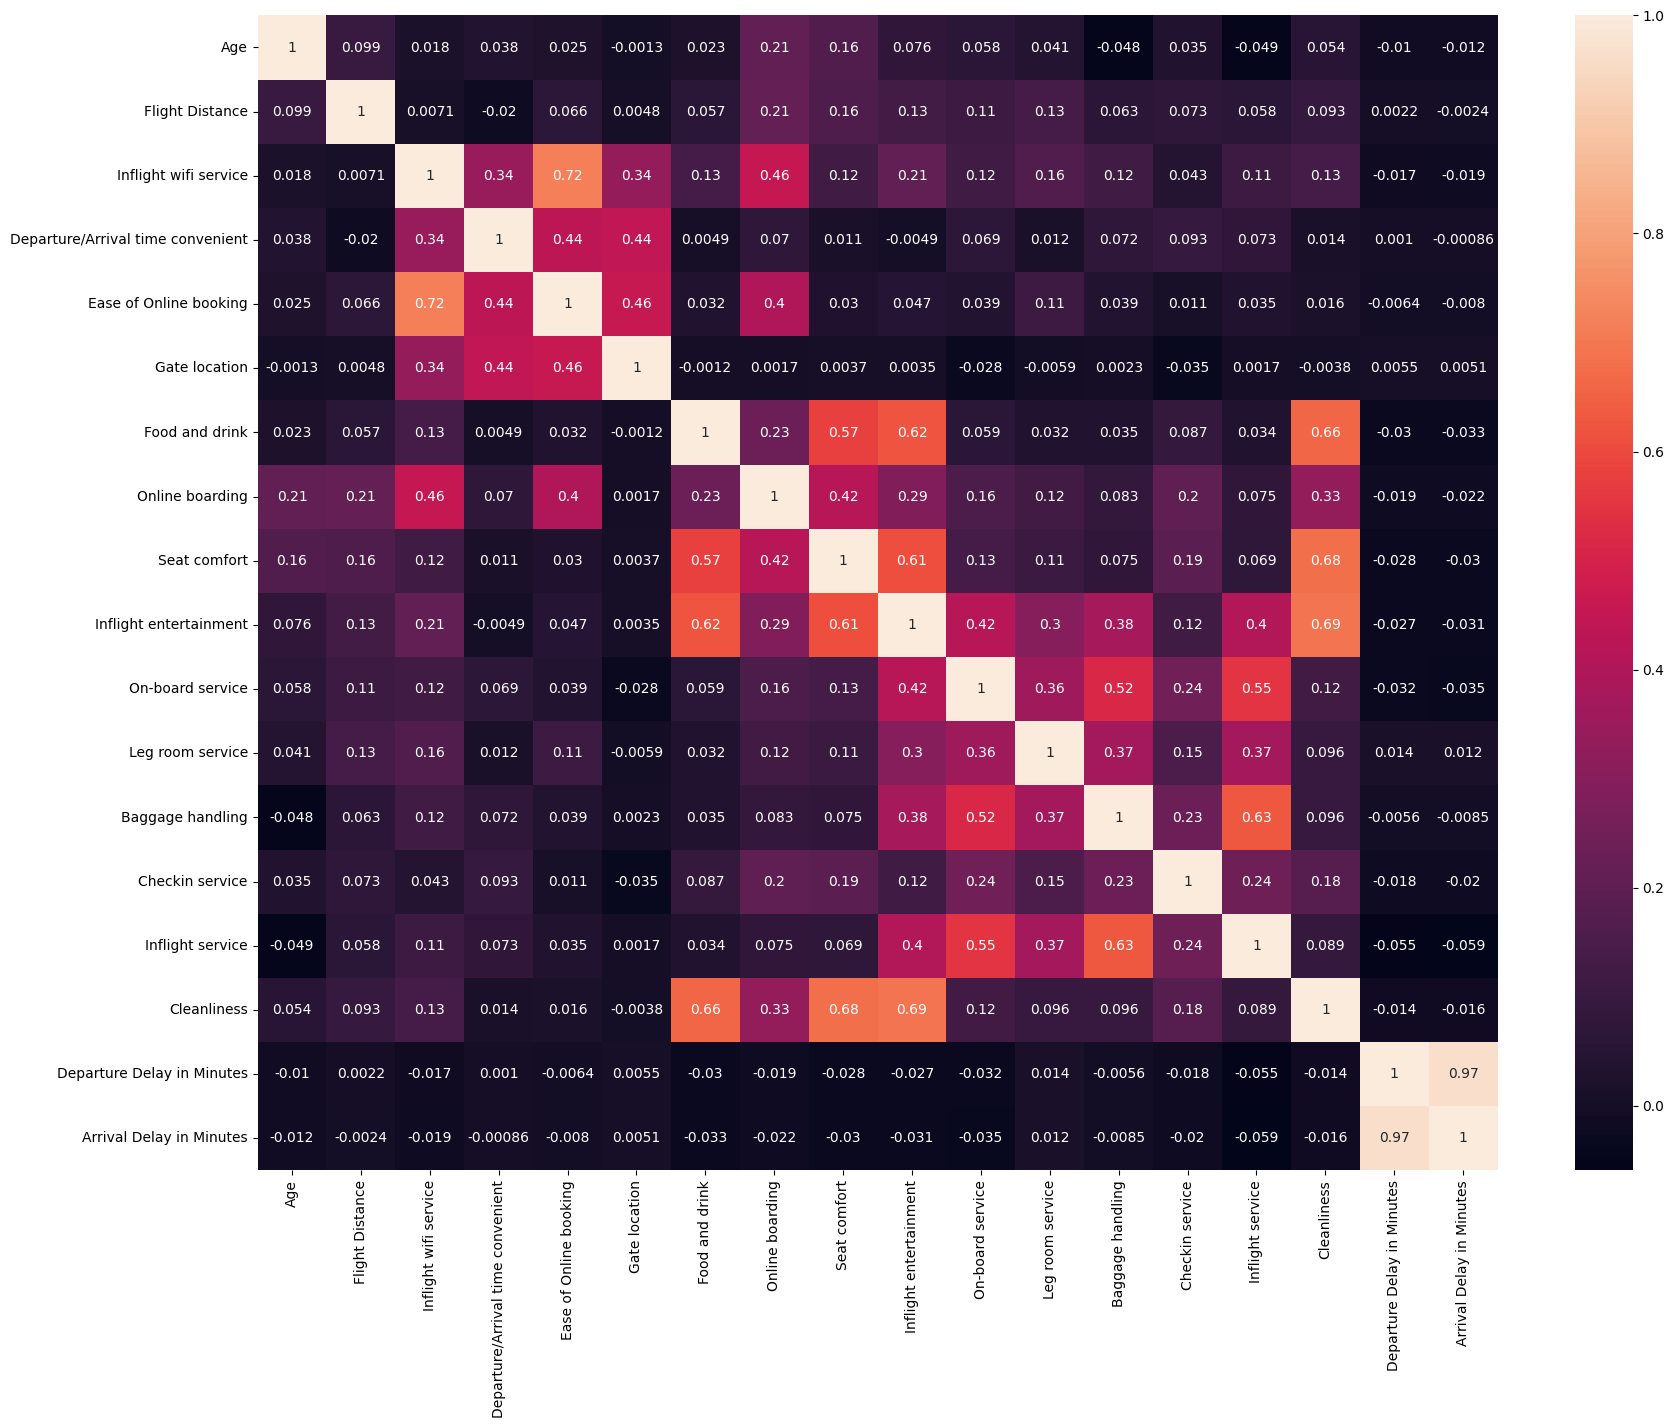

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

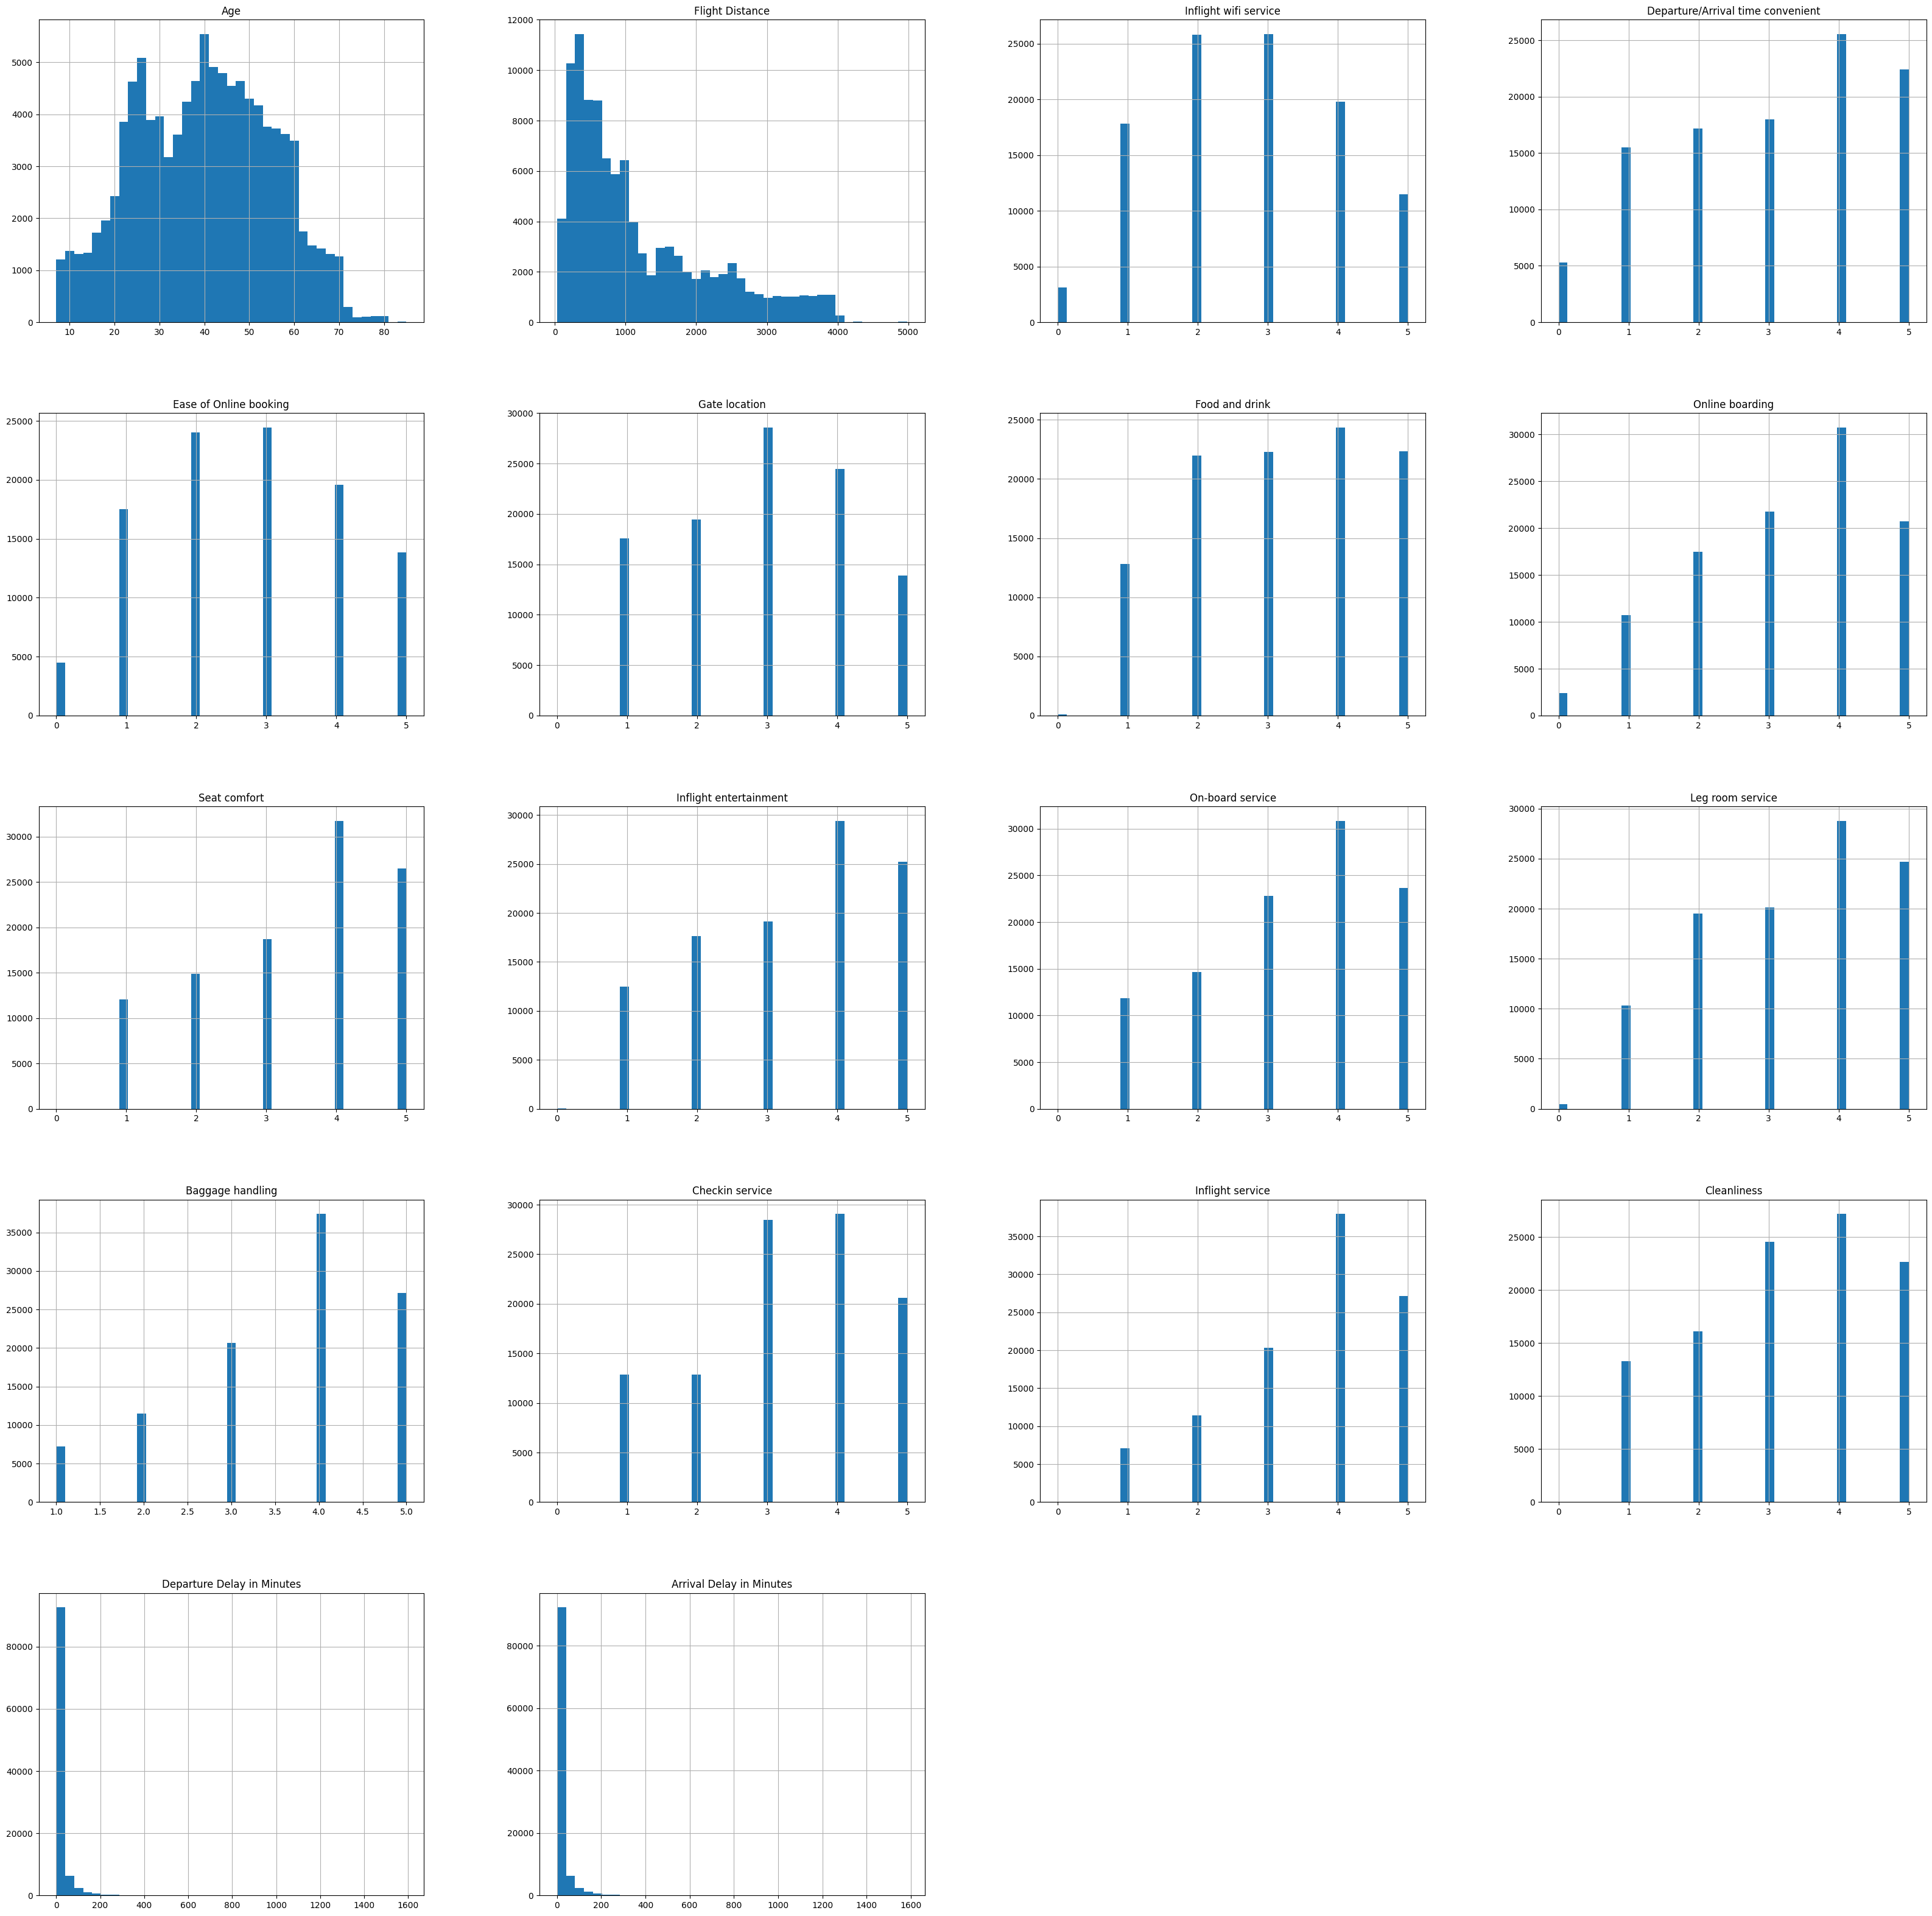

In [ ]:
bins = int(1 + 3.3 * np.log(df.shape[0]))
df.hist(figsize=(40, 40), bins=bins)
plt.show()

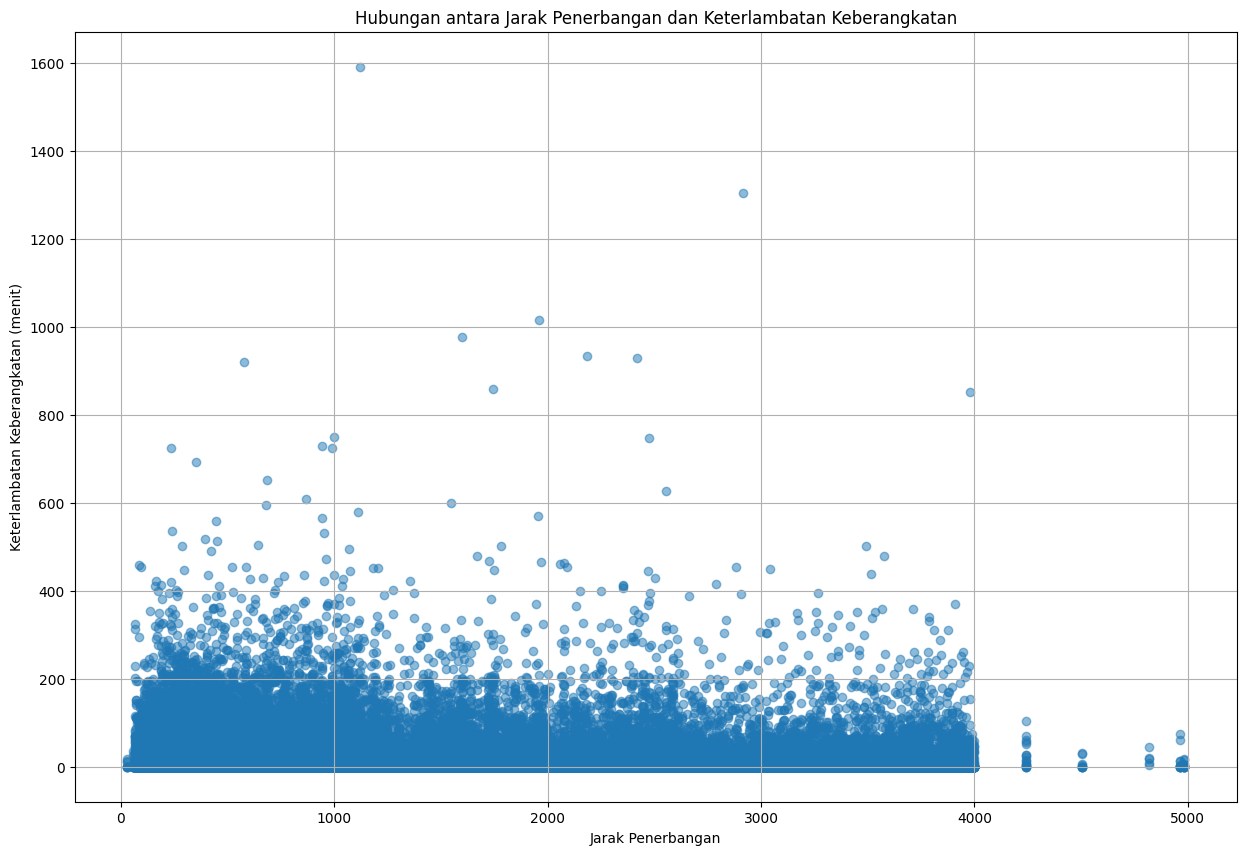

In [ ]:
plt.figure(figsize=(15 , 10))
plt.scatter(df['Flight Distance'], df['Departure Delay in Minutes'], alpha=0.5)
plt.title('Hubungan antara Jarak Penerbangan dan Keterlambatan Keberangkatan')
plt.xlabel('Jarak Penerbangan')
plt.ylabel('Keterlambatan Keberangkatan (menit)')
plt.grid(True)
plt.show()

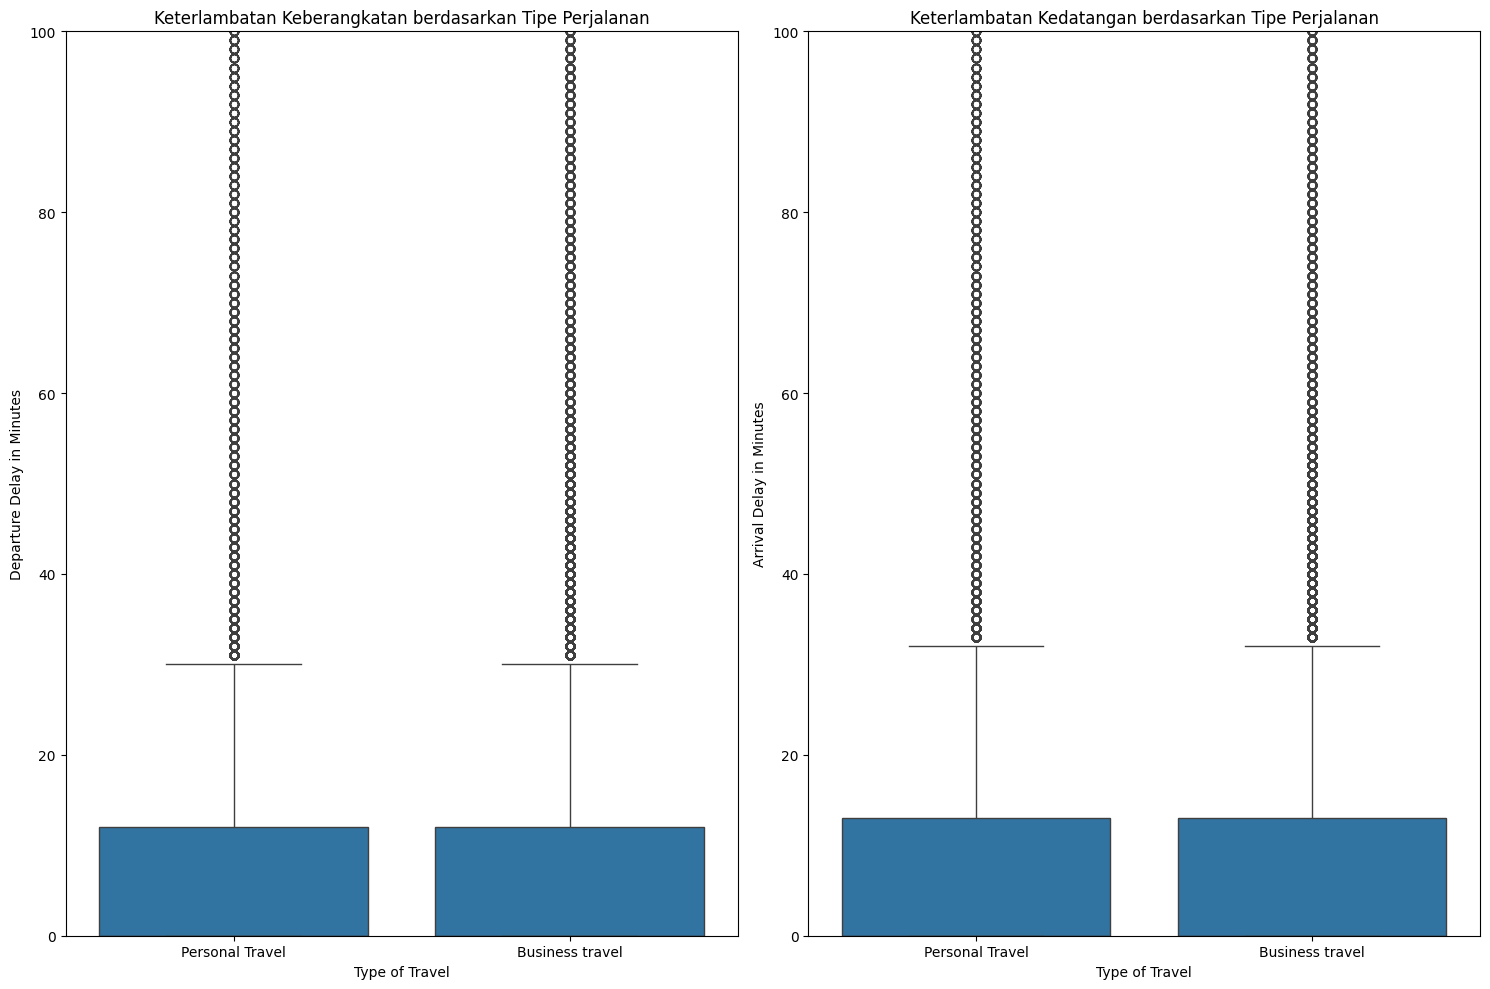

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x='Type of Travel', y='Departure Delay in Minutes', data=df)
plt.title('Keterlambatan Keberangkatan berdasarkan Tipe Perjalanan')
plt.ylim(0, 100)  # Batasi untuk visibilitas yang lebih baik

plt.subplot(1, 2, 2)
sns.boxplot(x='Type of Travel', y='Arrival Delay in Minutes', data=df)
plt.title('Keterlambatan Kedatangan berdasarkan Tipe Perjalanan')
plt.ylim(0, 100)  # Batasi untuk visibilitas yang lebih baik

plt.tight_layout()
plt.show()

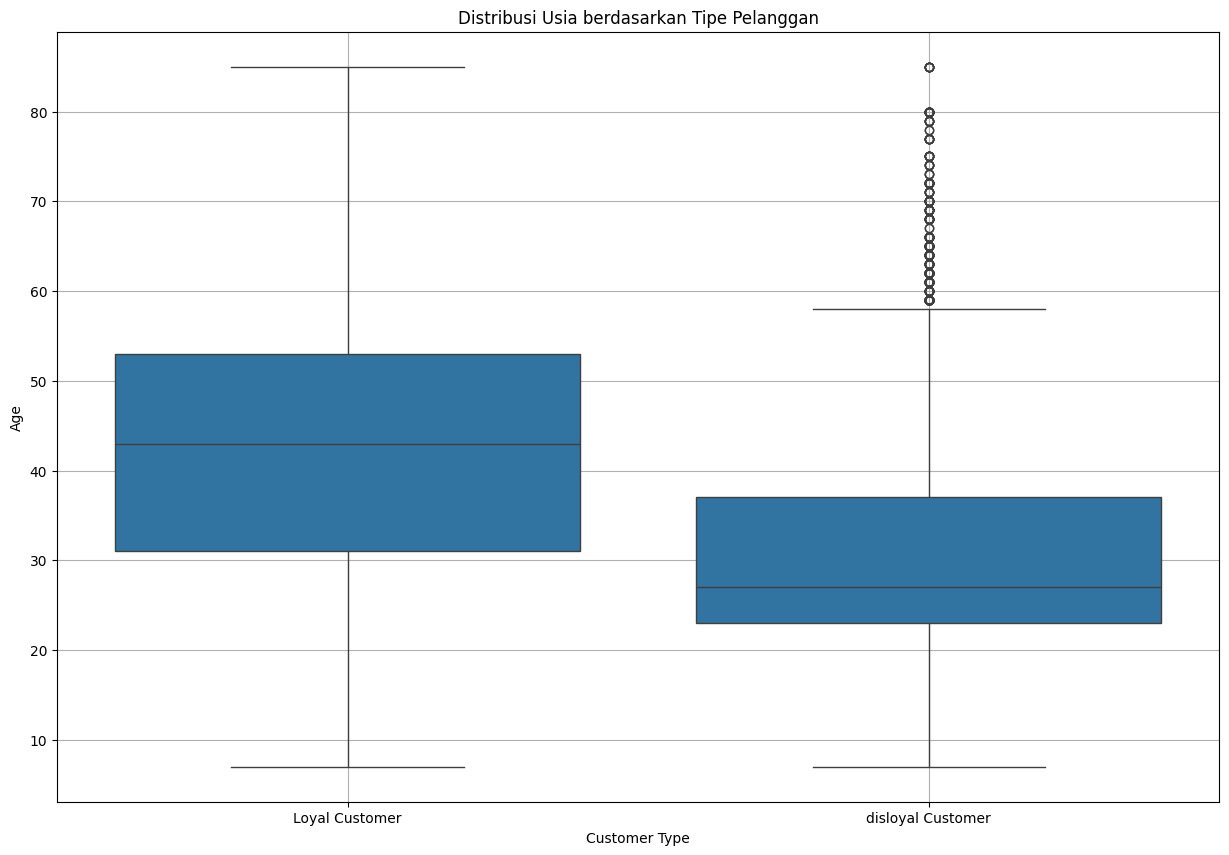

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Customer Type', y='Age', data=df)
plt.title('Distribusi Usia berdasarkan Tipe Pelanggan')
plt.grid(True)
plt.show()

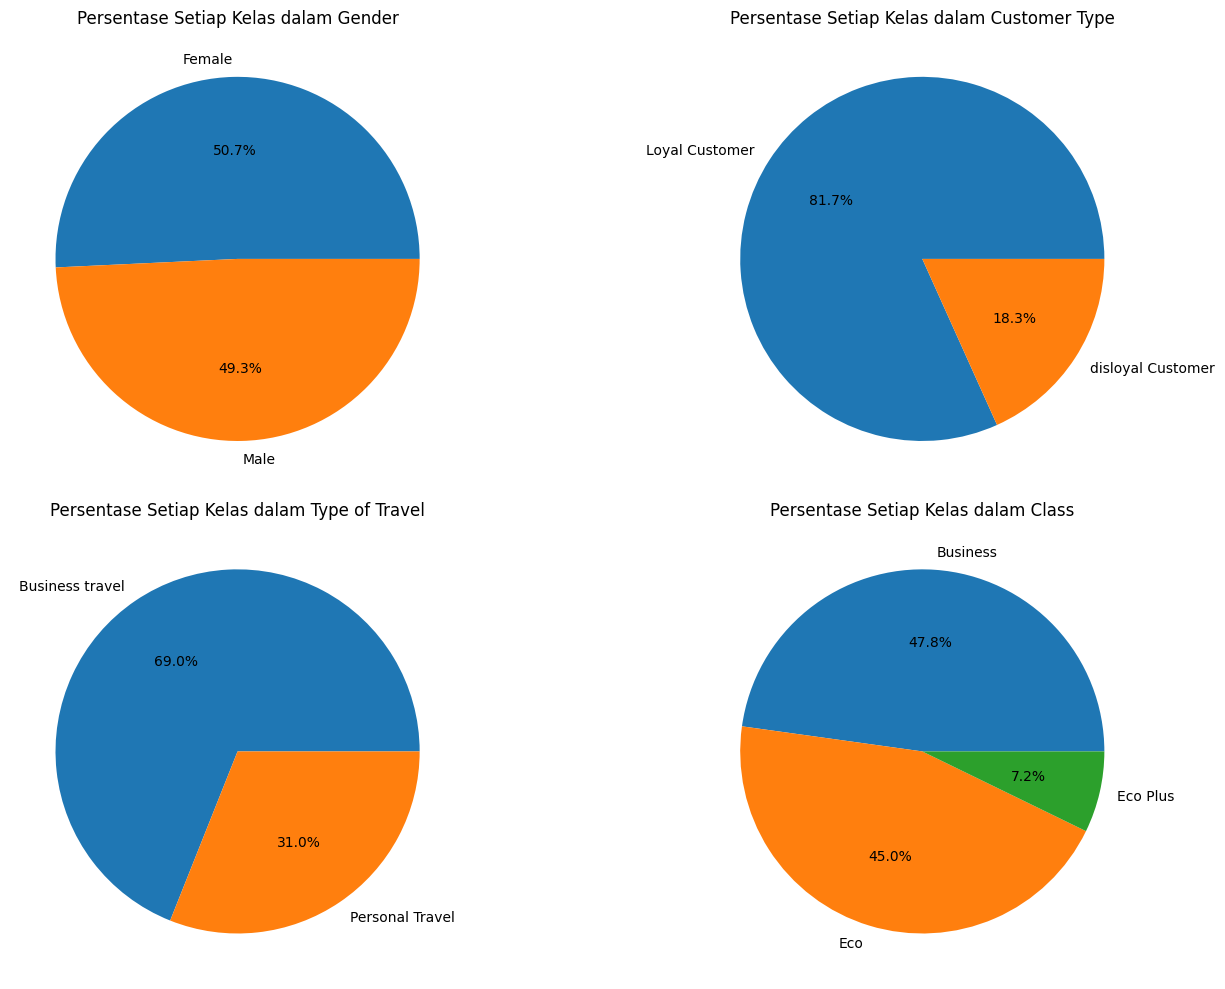

In [ ]:
data_object_columns = df.select_dtypes(include='object').columns

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for index, column in enumerate(data_object_columns):
    row = index // 2
    col = index % 2
    df[column].value_counts().plot(kind='pie',
                                   ax=ax[row, col],
                                   autopct='%1.1f%%',
                                   ylabel='')

    ax[row, col].set_title(f'Persentase Setiap Kelas dalam {column}')

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [ ]:
data = df.copy(deep=True)
data.drop_duplicates(inplace=True)

# **Konversi data Kategorikal ke Numerik**

In [ ]:
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
data['Type of Travel'] = data['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})
data['Class'] = data['Class'].map({'Business': 2, 'Eco Plus': 1, 'Eco': 0})

# **Handling Missing Value**

## **Fill Missing Value dengan Iterative Imputer**

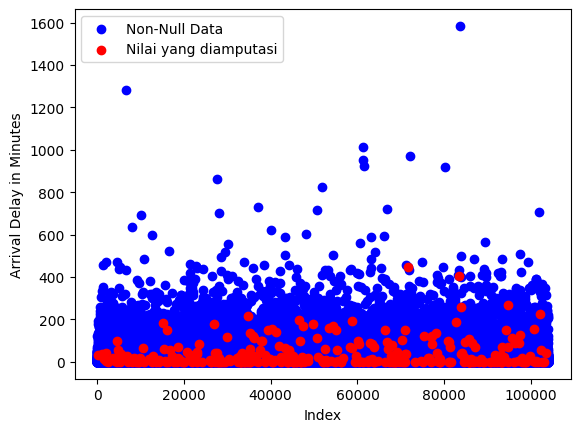

In [ ]:
missing_mask = data['Arrival Delay in Minutes'].isna()

iterative_imputer = IterativeImputer(random_state=42)
data_iterative_imputed = iterative_imputer.fit_transform(data)
data_iterative_imputed = pd.DataFrame(data_iterative_imputed, columns=data.columns)

data_final_it = data_iterative_imputed.reset_index(drop=True)

plt.scatter(data_final_it.index, data_final_it['Arrival Delay in Minutes'], label='Non-Null Data', color='blue')

plt.scatter(data_final_it.loc[missing_mask, :].index,
            data_final_it.loc[missing_mask, 'Arrival Delay in Minutes'],
            color='red', label='Nilai yang diamputasi')


plt.xlabel('Index')
plt.ylabel('Arrival Delay in Minutes')
plt.legend()
plt.show()

## **Fill Missing Value dengan KNN Imputer**

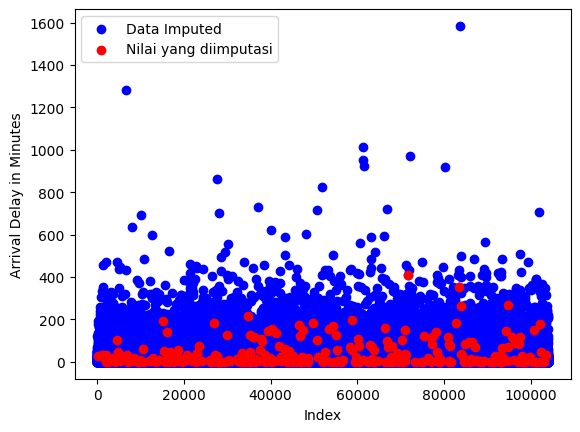

In [ ]:
knn_imputer = KNNImputer(n_neighbors=7)
data_knn_imputed = knn_imputer.fit_transform(data)
data_knn_imputed = pd.DataFrame(data_knn_imputed, columns=data.columns)

data_final_knn = data_knn_imputed.reset_index(drop=True)

plt.scatter(data_final_knn.index, data_final_knn['Arrival Delay in Minutes'],
            label='Data Imputed', color='blue')

plt.scatter(data_final_knn.loc[missing_mask, :].index,
            data_final_knn.loc[missing_mask, 'Arrival Delay in Minutes'],
            color='red', label='Nilai yang diimputasi')

plt.xlabel('Index')
plt.ylabel('Arrival Delay in Minutes')
plt.legend()
plt.show()


# **Handling Outliers**

## **Clip Data**
Fitur-fitur yang diproses tidak mungkin memiliki nilai min. Maka dari itu saya melakukan clip agar nilai minimum sama dengan 0

In [ ]:
con_columns = ["Departure Delay in Minutes", "Arrival Delay in Minutes", "Age", "Flight Distance"]

for column in con_columns:
    data_final_it[column] = data_final_it[column].clip(lower=0)

## **Visualisasi Outliers Dengan IQR**

In [ ]:
def calculate_iqr_bounds(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = 0
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

### **Data Sebelum Transformasi**

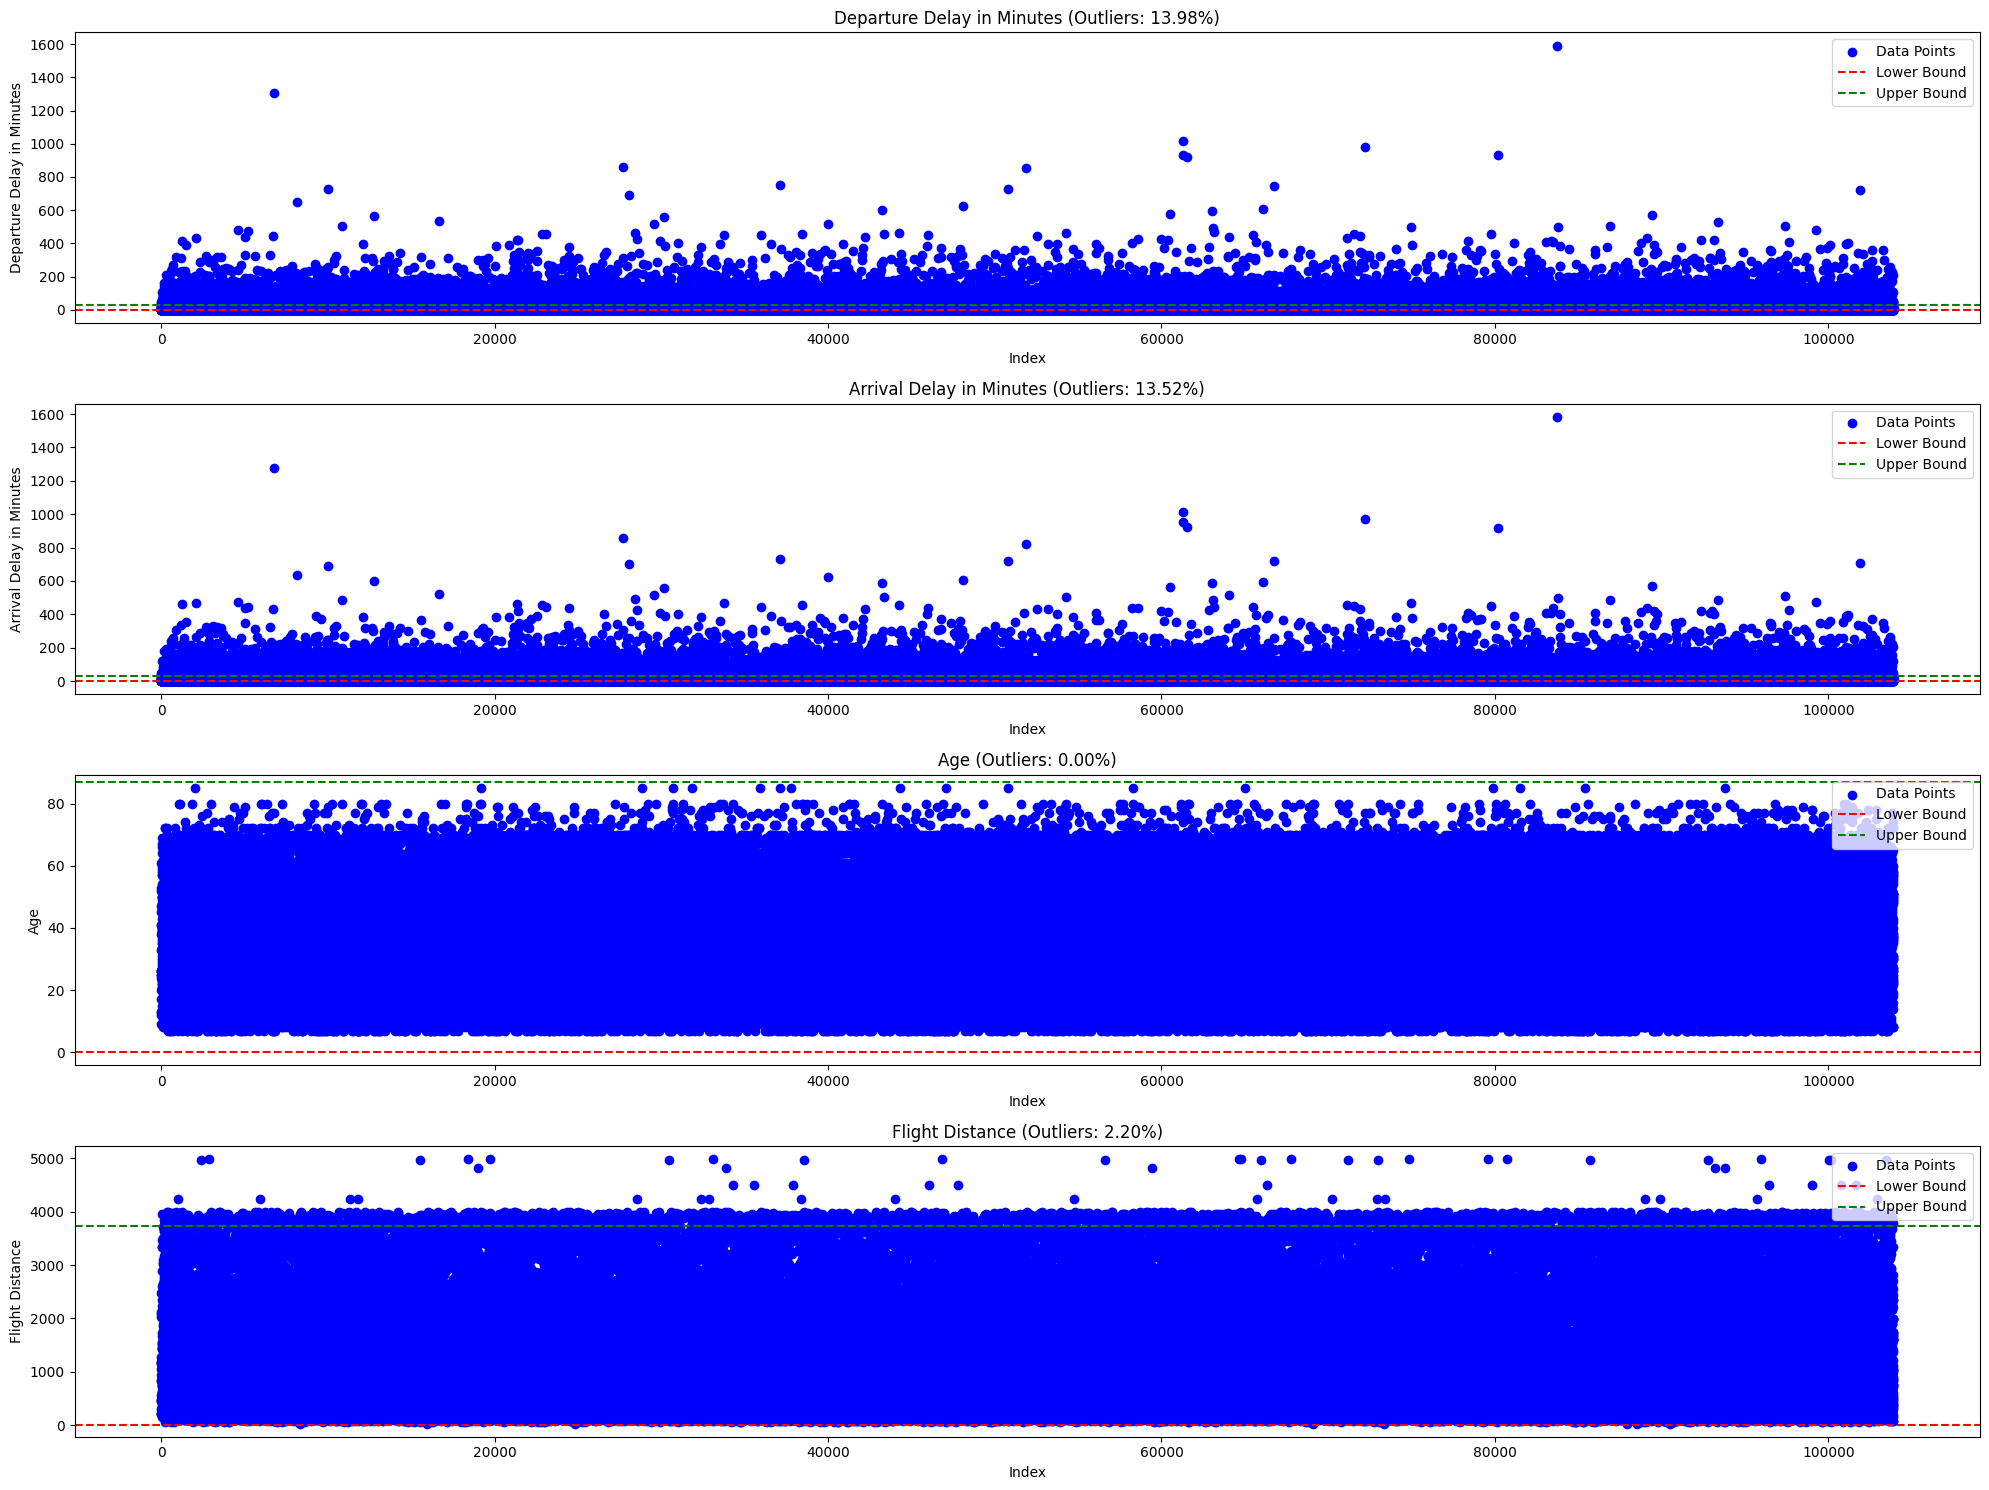

In [ ]:
con_columns = ["Departure Delay in Minutes", "Arrival Delay in Minutes", "Age", "Flight Distance"]

fig, ax = plt.subplots(len(con_columns), 1, figsize=(20, 15))

for i, column in enumerate(con_columns):
    lower_bound, upper_bound = calculate_iqr_bounds(data_final_it[column])

    outlier_mask = (data_final_it[column] < lower_bound) | (data_final_it[column] > upper_bound)
    n_outliers = outlier_mask.sum()
    total = len(data_final_it[column])
    percent_outliers = (n_outliers / total) * 100

    ax[i].scatter(data_final_it.index, data_final_it[column], color='blue', label='Data Points')

    ax[i].axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax[i].axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')

    ax[i].set_title(f"{column} (Outliers: {percent_outliers:.2f}%)")
    ax[i].set_xlabel('Index')
    ax[i].set_ylabel(column)

    ax[i].legend()

plt.tight_layout()
plt.show()

### **Data Setelah Transformasi**

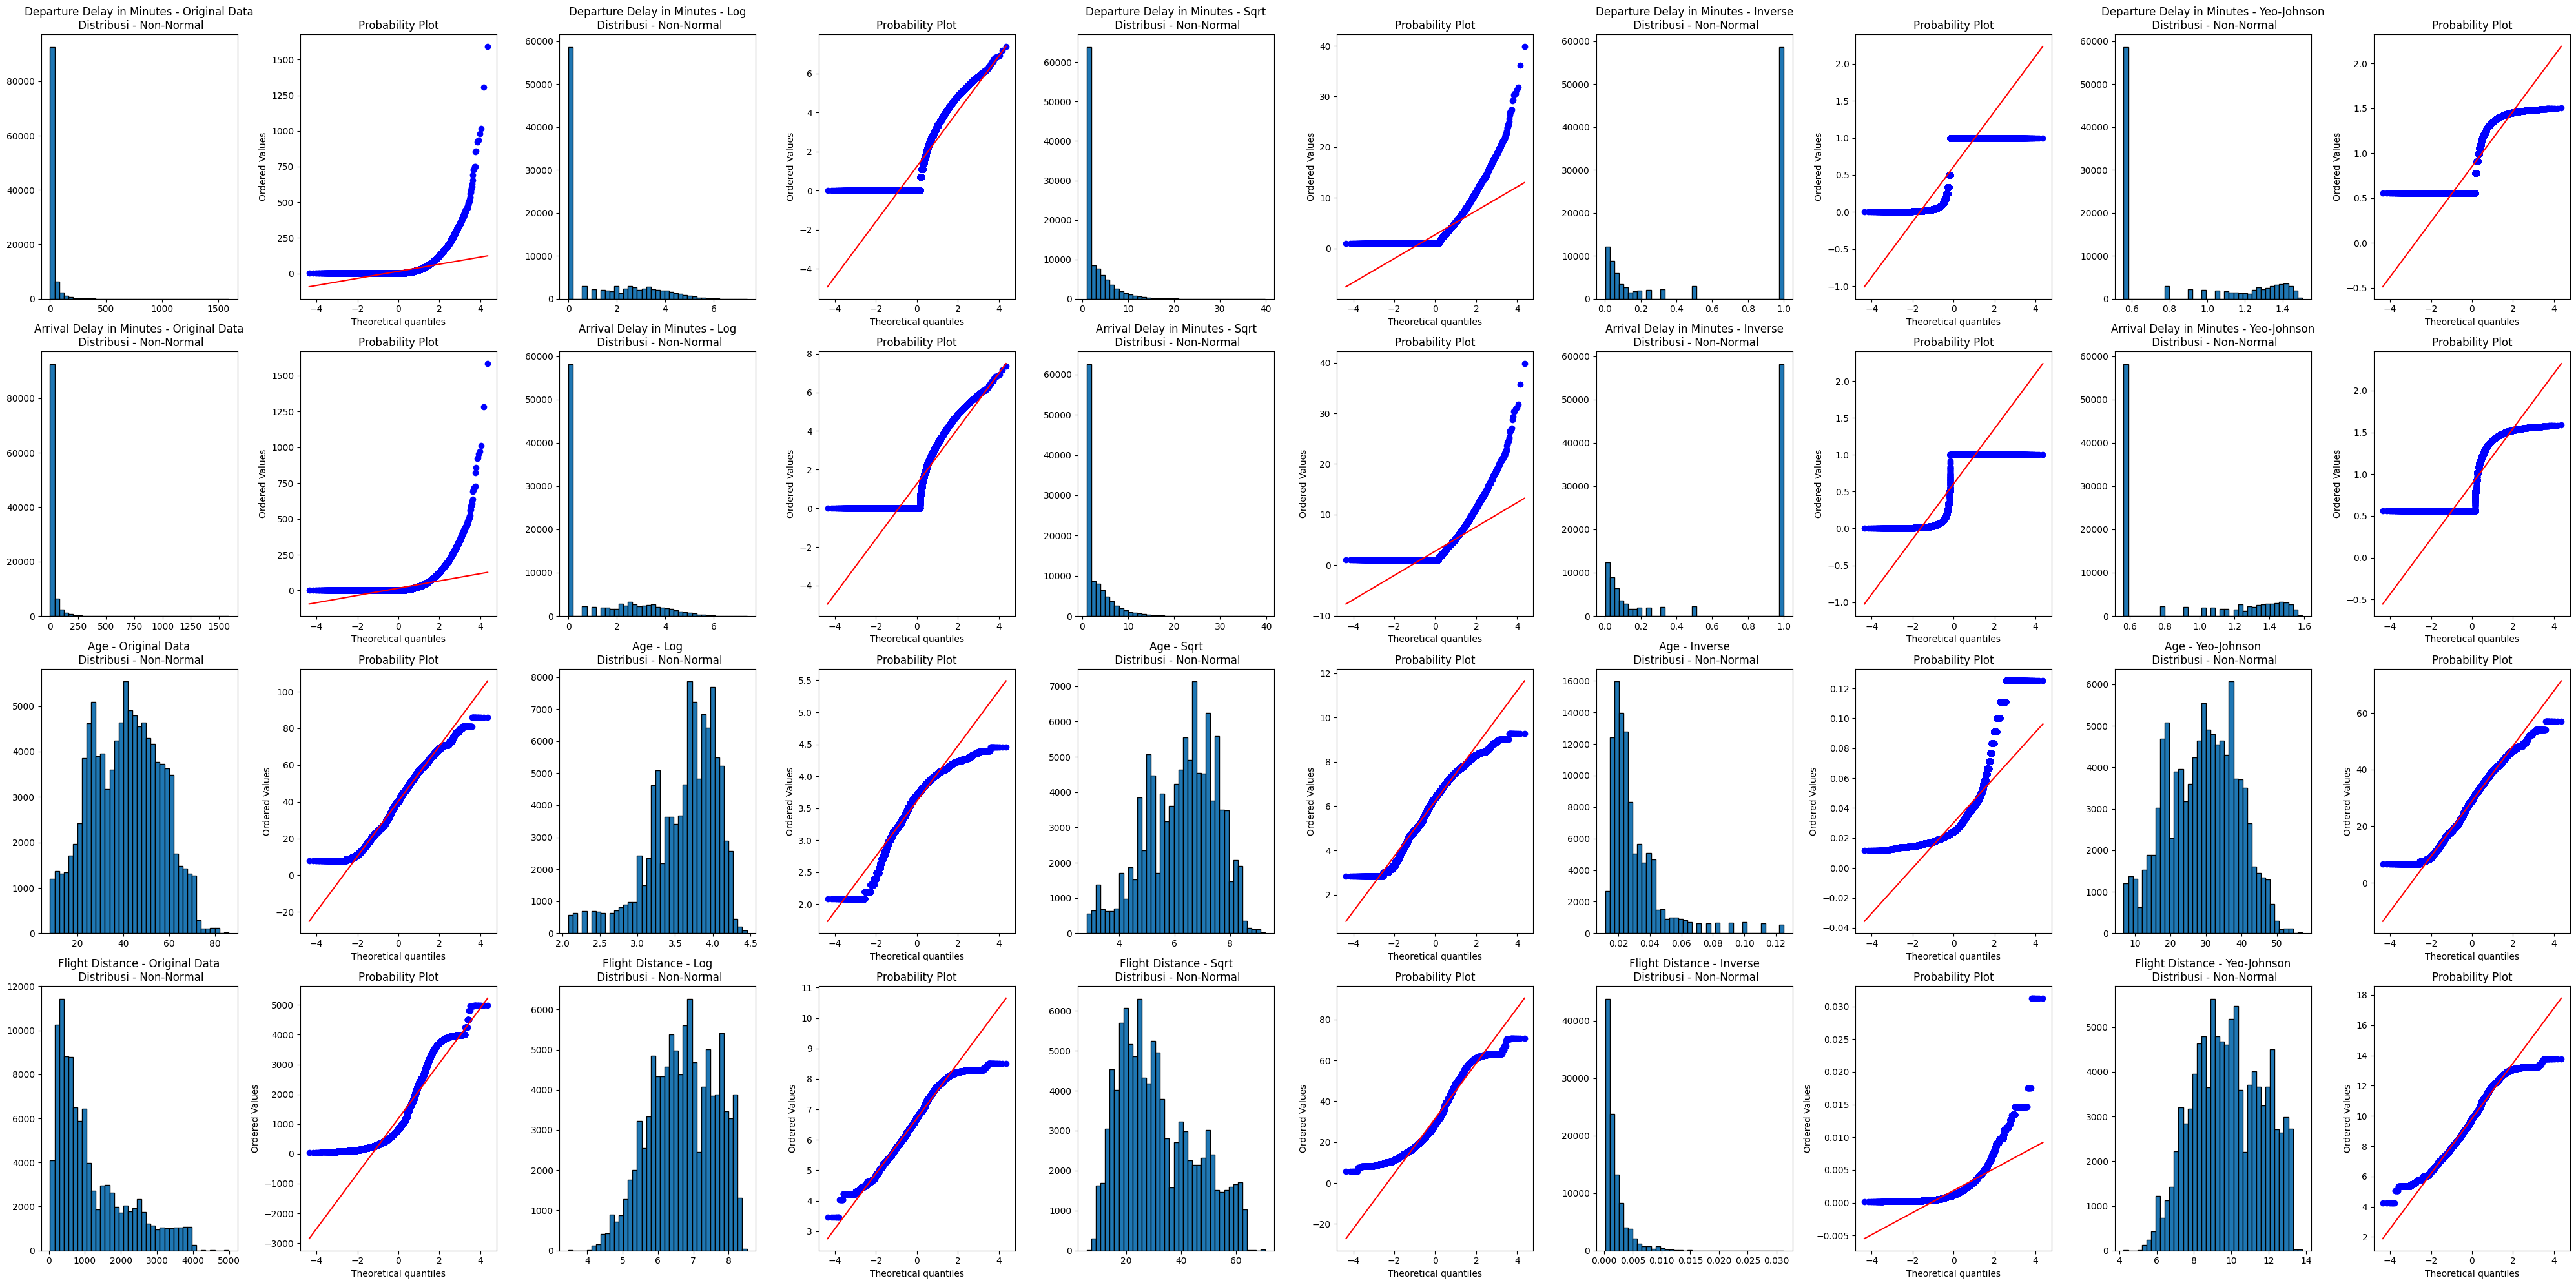

In [ ]:
transformed_columns = ["Departure Delay in Minutes", "Arrival Delay in Minutes", "Age", "Flight Distance"]

fig, ax = plt.subplots(len(transformed_columns), 10, figsize=(40, 20))

for i, column in enumerate(transformed_columns):
    x = data_final_it[column] + 1
    transform_methods = [x, np.log(x), np.sqrt(x), 1/x, stats.yeojohnson(x)[0]]
    method_names = ["Original Data", "Log", "Sqrt", "Inverse", "Yeo-Johnson"]

    for j, transform in enumerate(transform_methods):
        result = stats.anderson(transform, dist='norm')
        distribusi = 'Normal' if result.statistic < result.critical_values[2] else 'Non-Normal'

        stats.probplot(transform, dist="norm", plot=ax[i, j * 2 + 1])
        ax[i, j * 2].hist(transform, bins=bins, edgecolor='black')
        ax[i, j * 2].set_title(f"{column} - {method_names[j]}\n Distribusi - {distribusi}")

plt.tight_layout()
plt.show()

In [ ]:
df_trans = data_final_it.copy(deep=True)
df_trans['Departure Delay in Minutes'] = np.log(data_final_it['Departure Delay in Minutes'] + 1)
df_trans['Arrival Delay in Minutes'] = np.log(data_final_it['Arrival Delay in Minutes'] + 1)
df_trans['Flight Distance'] = stats.yeojohnson(data_final_it['Flight Distance'] + 1)[0]

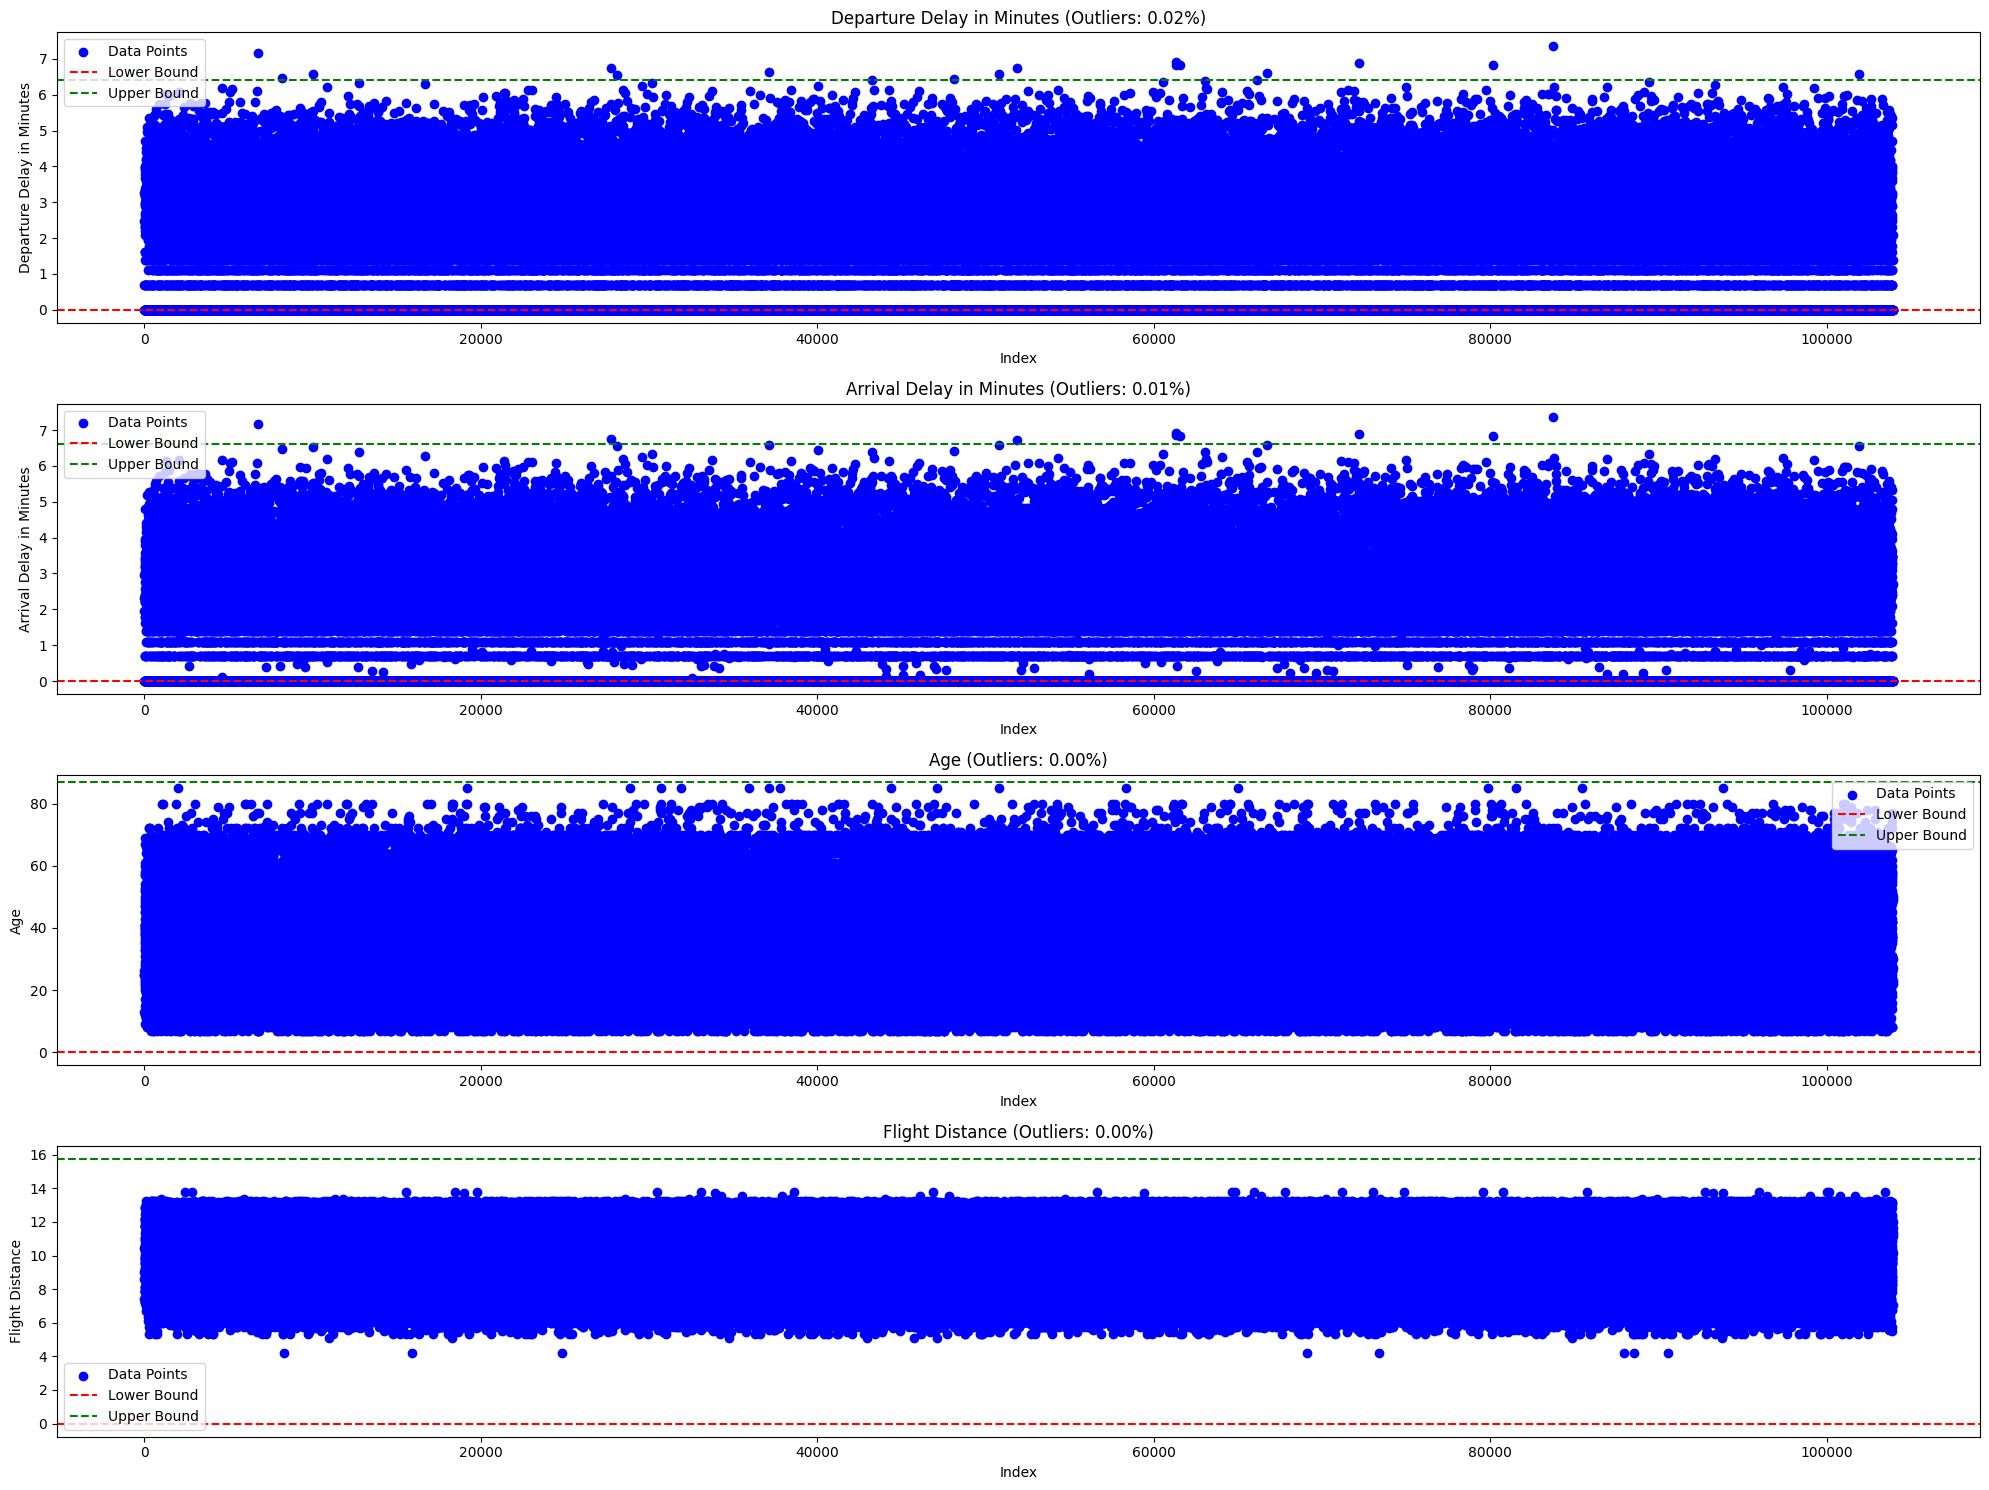

In [ ]:
con_columns = ["Departure Delay in Minutes", "Arrival Delay in Minutes", "Age", "Flight Distance"]

fig, ax = plt.subplots(len(con_columns), 1, figsize=(20, 15))

for i, column in enumerate(con_columns):
    lower_bound, upper_bound = calculate_iqr_bounds(df_trans[column])

    outlier_mask = (df_trans[column] < lower_bound) | (df_trans[column] > upper_bound)
    n_outliers = outlier_mask.sum()
    total = len(df_trans[column])
    percent_outliers = (n_outliers / total) * 100

    ax[i].scatter(df_trans.index, df_trans[column], color='blue', label='Data Points')

    ax[i].axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax[i].axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')

    ax[i].set_title(f"{column} (Outliers: {percent_outliers:.2f}%)")
    ax[i].set_xlabel('Index')
    ax[i].set_ylabel(column)

    ax[i].legend()

plt.tight_layout()
plt.show()

# **Factor Analysis**

In [ ]:
chi_square_statistic, p_value = calculate_bartlett_sphericity(df_trans)

print("Chi-Square Statistic: ", chi_square_statistic)
print("P-value: ", p_value)

Chi-Square Statistic:  866844.5627922793
P-value:  0.0


In [ ]:
kmo_all, kmo_model = calculate_kmo(df_trans)

print("KMO for All Variables:", kmo_all)
print("KMO for Model:", kmo_model)

KMO for All Variables: [0.39407495 0.45937616 0.65870447 0.53288341 0.66961562 0.77473564
 0.72365501 0.7146711  0.69364065 0.70023694 0.84010944 0.76456302
 0.85944407 0.76068583 0.83969374 0.89532578 0.81612775 0.72542115
 0.78190476 0.81008787 0.50259739 0.50586208]
KMO for Model: 0.7261932452713772


In [ ]:
final_data = df_trans.iloc[::, [i > 0.5 for i in kmo_all]] # Hanya mengambil fitur yang memiliki nilai KMO lebih dari 0.5

## **Menentukan Jumlah Faktor dengan PCA**

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_data)

In [ ]:
pca = PCA()
pca.fit(data_scaled)

PCA()

In [ ]:
eigen_values = pca.explained_variance_
rasio_varians = pca.explained_variance_ratio_
rasio_cum = rasio_varians.cumsum()

In [ ]:
pca_results = pd.DataFrame({
    'Eigen Value': eigen_values,
    'Rasio Variance': rasio_varians,
    'cumulative percentage of variance': rasio_cum
})
pca_results.index = ['comp ' + str(i+1) for i in pca_results.index]

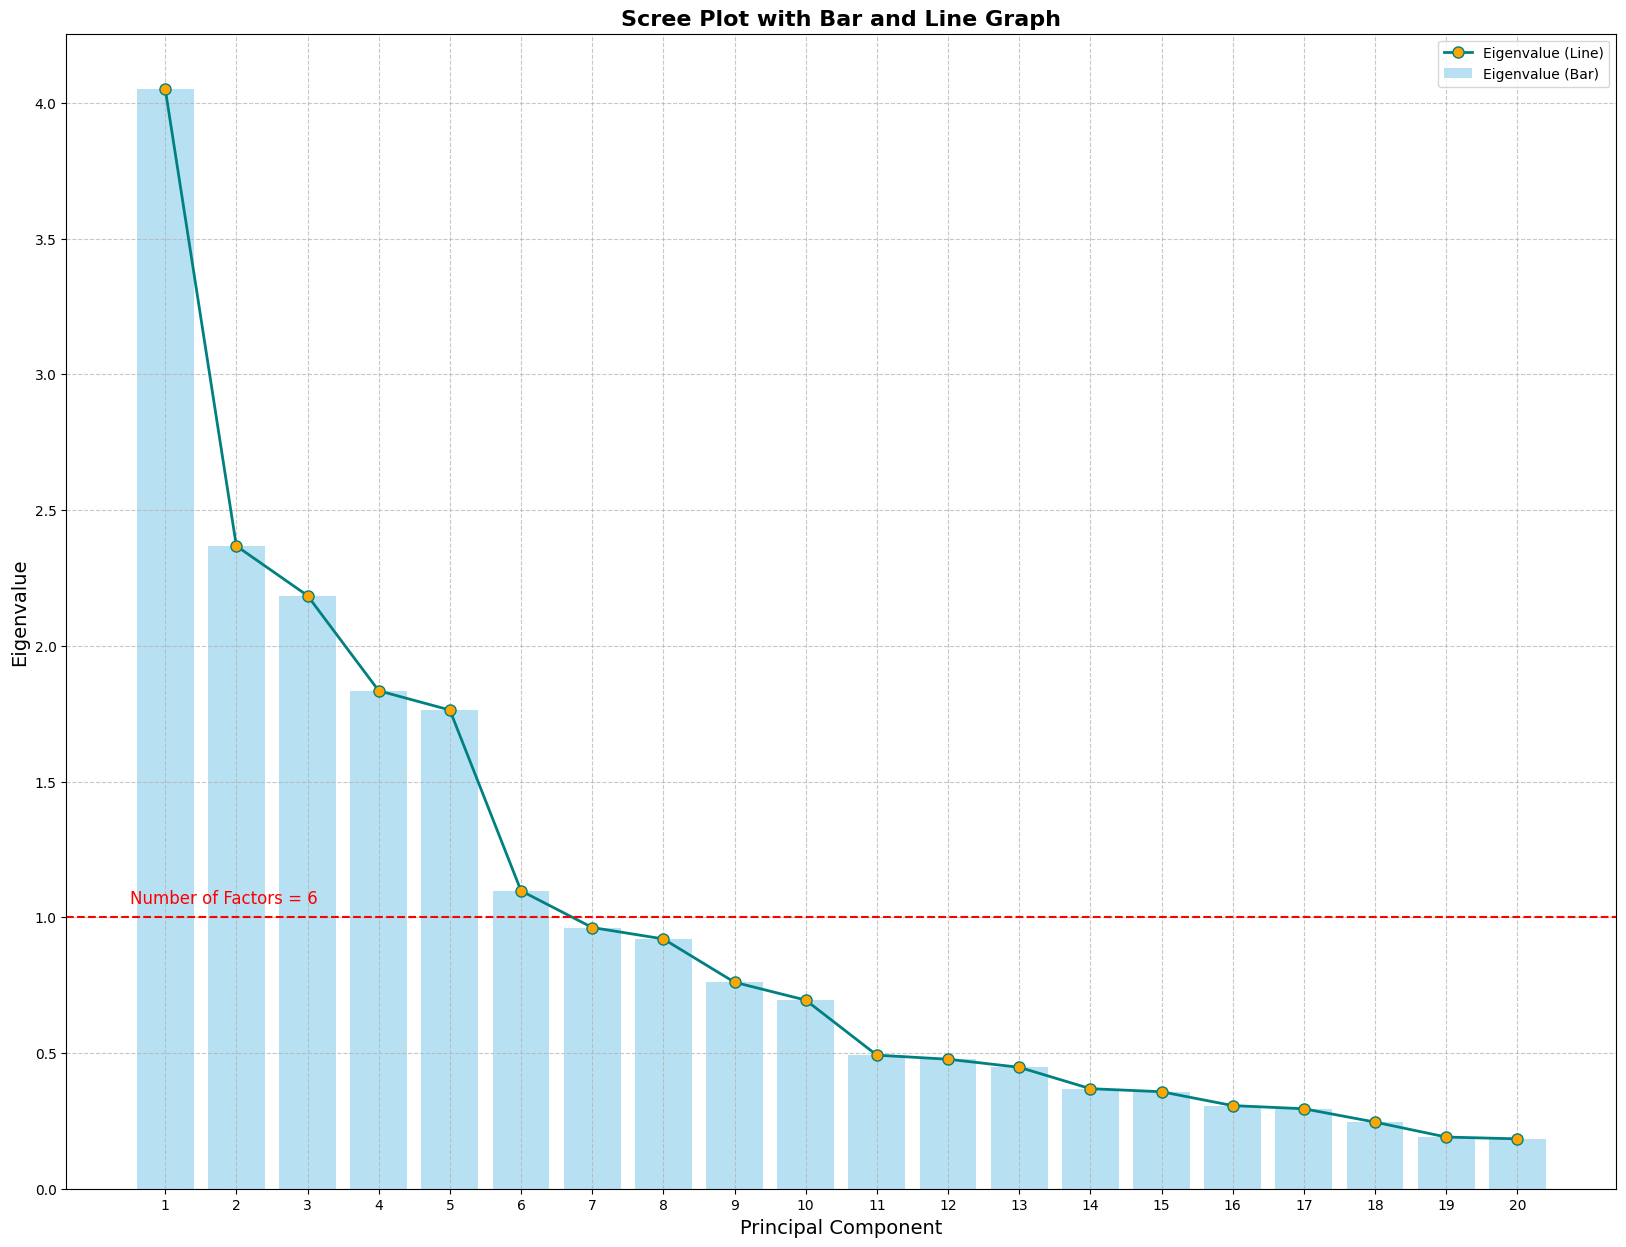

In [ ]:
plt.figure(figsize=(20, 15))
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, alpha=0.6, color='skyblue', label='Eigenvalue (Bar)')
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-', linewidth=2, color='teal', markerfacecolor='orange', markersize=8, label='Eigenvalue (Line)')
plt.title('Scree Plot with Bar and Line Graph', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.axhline(y=1, color='red', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(pca.explained_variance_) + 1))
plt.yticks(np.arange(0, max(pca.explained_variance_), step=0.5))
plt.legend()

n_factors = np.sum(pca.explained_variance_ >= 1)
plt.text(0.5, 1.05, f'Number of Factors = {n_factors}', color = 'red', fontsize=12)

plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(data_scaled)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [ ]:
result = pd.DataFrame(fa.loadings_, index=final_data.columns, columns=[f'Faktor {i+1}' for i in range(4)])

## **Visualisasi Kontribusi Setiap Fitur per Faktor**

In [ ]:
def visualisasi_3d(data, x, y, z, color='blue'):
    fig = go.Figure(data=[go.Scatter3d(
        x=data[x],
        y=data[y],
        z=data[z],
        mode='markers',
        marker=dict(
            color=color,
            size=5,
            colorscale='Viridis',
            opacity=0.8
        )
    )])

    fig.update_layout(
        title='Contoh 3D Scatter Plot dengan Plotly',
        scene=dict(
            xaxis_title=x,
            yaxis_title=y,
            zaxis_title=z
        )
    )

    fig.show()

In [ ]:
result.loc[:, "Faktor 1"].sort_values(ascending=False)[:3]

Cleanliness               0.828197
Seat comfort              0.806796
Inflight entertainment    0.725964
Name: Faktor 1, dtype: float64

In [ ]:
visualisasi_3d(final_data, "Cleanliness", "Seat comfort", "Inflight entertainment")

**Faktor 1: Kebersihan dan Kenyamanan Kabin**  
Faktor ini menunjukkan bahwa tingkat kepuasan penumpang sangat dipengaruhi oleh kebersihan kabin dan kenyamanan kursi, serta hiburan yang disediakan selama penerbangan. Penumpang cenderung memberikan penilaian positif ketika pesawat terasa bersih, kursinya nyaman, dan terdapat hiburan yang memadai selama penerbangan.


In [ ]:
result.loc[:, "Faktor 2"].sort_values(ascending=False)[:3]

Inflight service    0.786276
Baggage handling    0.756269
On-board service    0.702609
Name: Faktor 2, dtype: float64

In [ ]:
visualisasi_3d(final_data, "Inflight service", "Baggage handling", "On-board service")

**Faktor 2: Kualitas Layanan On-board**  
Faktor ini mengelompokkan aspek-aspek layanan selama penerbangan yang berhubungan dengan pelayanan on-board secara keseluruhan, mulai dari pelayanan di dalam pesawat, penanganan bagasi, hingga layanan tambahan yang diberikan kepada penumpang. Nilai loading yang tinggi menunjukkan bahwa kualitas layanan selama penerbangan merupakan komponen penting yang mempengaruhi kepuasan penumpang.

In [ ]:
result.loc[:, "Faktor 3"].sort_values(ascending=False)[:3]

Ease of Online booking    0.937546
Inflight wifi service     0.735736
Gate location             0.503030
Name: Faktor 3, dtype: float64

In [ ]:
visualisasi_3d(final_data, "Ease of Online booking", "Inflight wifi service", "Gate location")

**Faktor 3: Efisiensi Transaksi dan Fasilitas Digital**  
Faktor ini menunjukkan bahwa kemudahan dalam pemesanan online merupakan aspek yang sangat menentukan, diikuti dengan kualitas layanan wifi di pesawat dan lokasi gerbang keberangkatan. Dengan kata lain, pengalaman digital (proses pemesanan dan konektivitas) serta pengaturan operasional (lokasi gerbang) berkontribusi signifikan terhadap persepsi penumpang mengenai efisiensi dan kemudahan perjalanan.

In [ ]:
result.loc[:, "Faktor 4"].sort_values(ascending=False)[:3]

Departure Delay in Minutes    0.914493
Arrival Delay in Minutes      0.882794
Flight Distance               0.030097
Name: Faktor 4, dtype: float64

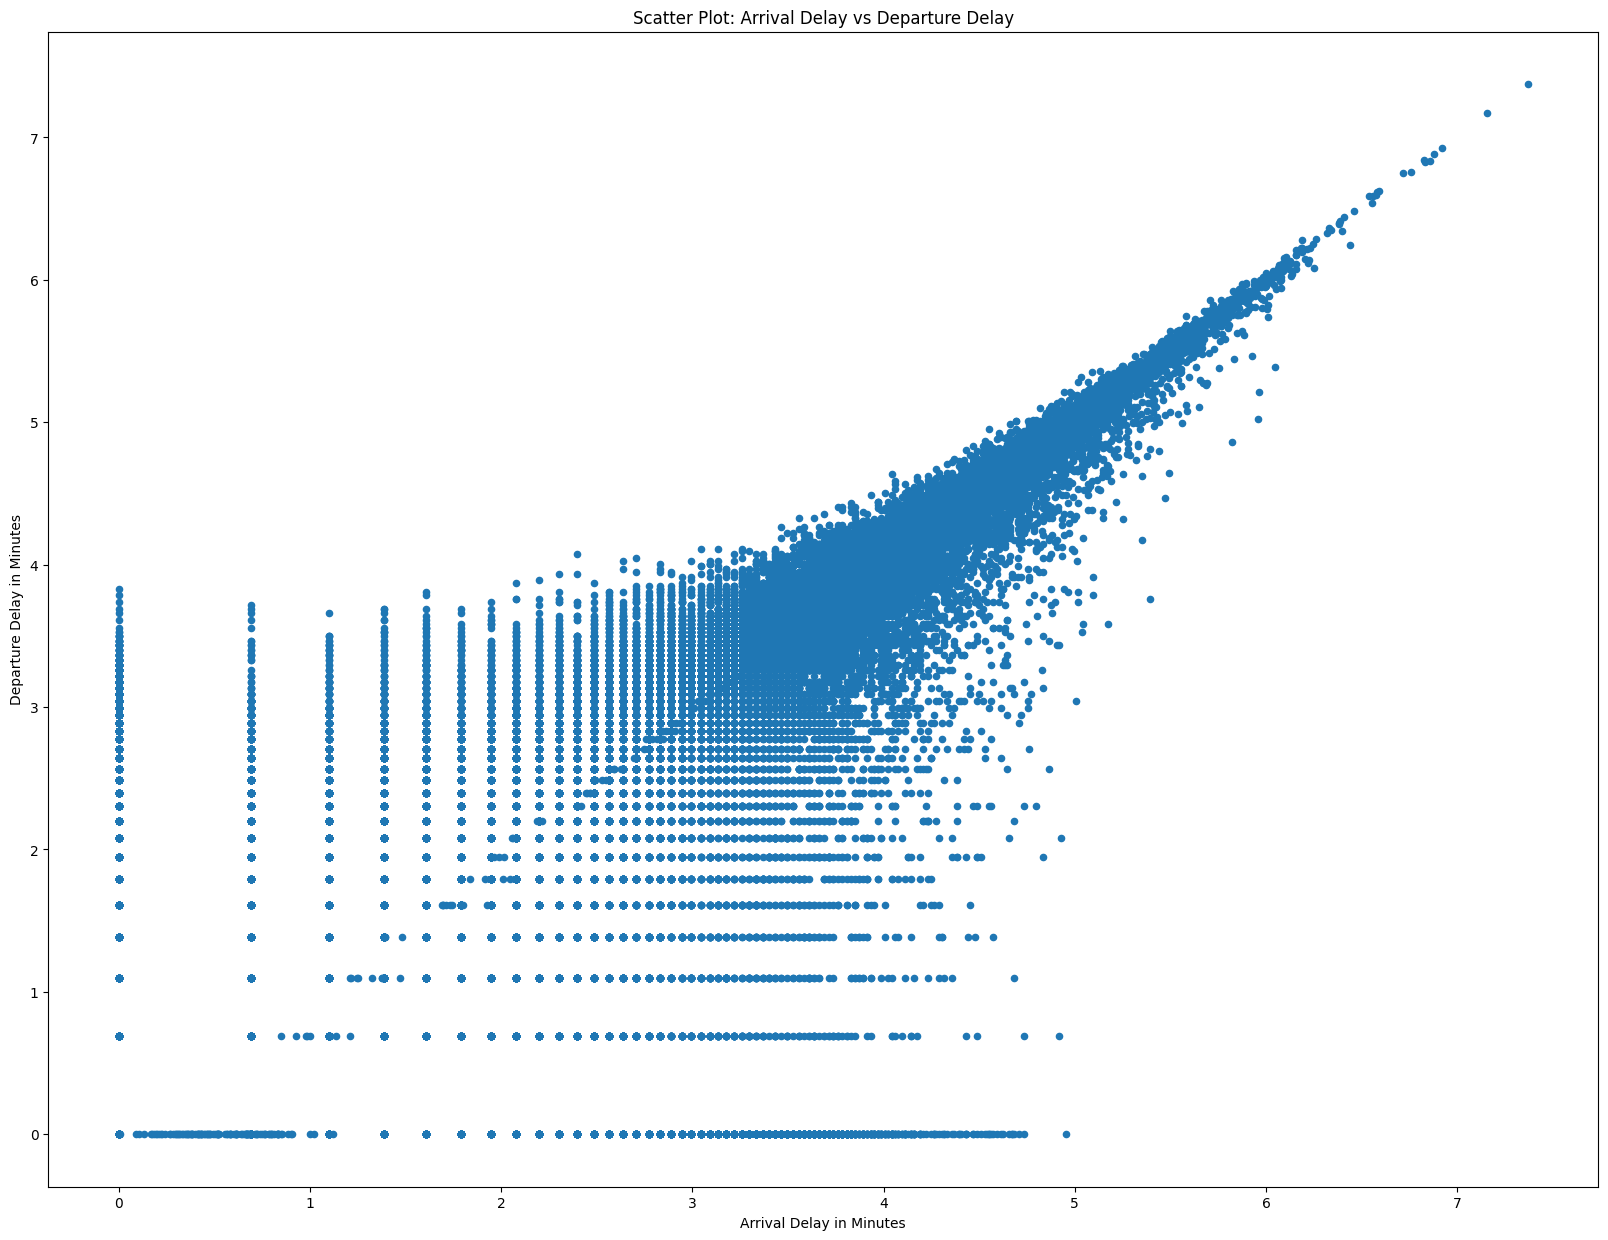

In [ ]:
final_data.plot(figsize=(20,15), kind='scatter', x='Arrival Delay in Minutes', y='Departure Delay in Minutes')
plt.title('Scatter Plot: Arrival Delay vs Departure Delay')
plt.show()

**Faktor 4: Ketepatan Waktu Penerbangan**  
Faktor ini mengkonsentrasikan aspek keterlambatan penerbangan, baik saat keberangkatan maupun kedatangan. Loadings yang sangat tinggi pada kedua variabel delay menunjukkan bahwa ketepatan waktu penerbangan adalah komponen penting yang memengaruhi kepuasan penumpang. Sedangkan Leg room service yang memiliki loading sangat rendah menunjukkan bahwa aspek tersebut tidak berkorelasi dengan kinerja waktu penerbangan dalam konteks faktor ini.

# **Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

### **Menggunakan Semua Fitur**

In [ ]:
min_cluster_sizes = range(3, 10)
sil_scores = []
n_clusters_list = []

for mcs in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=mcs, metric='euclidean')
    labels = clusterer.fit_predict(data_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_clusters_list.append(n_clusters)

    if n_clusters > 1:
        score = silhouette_score(data_scaled, labels)
        sil_scores.append(score)
    else:
        sil_scores.append(np.nan)

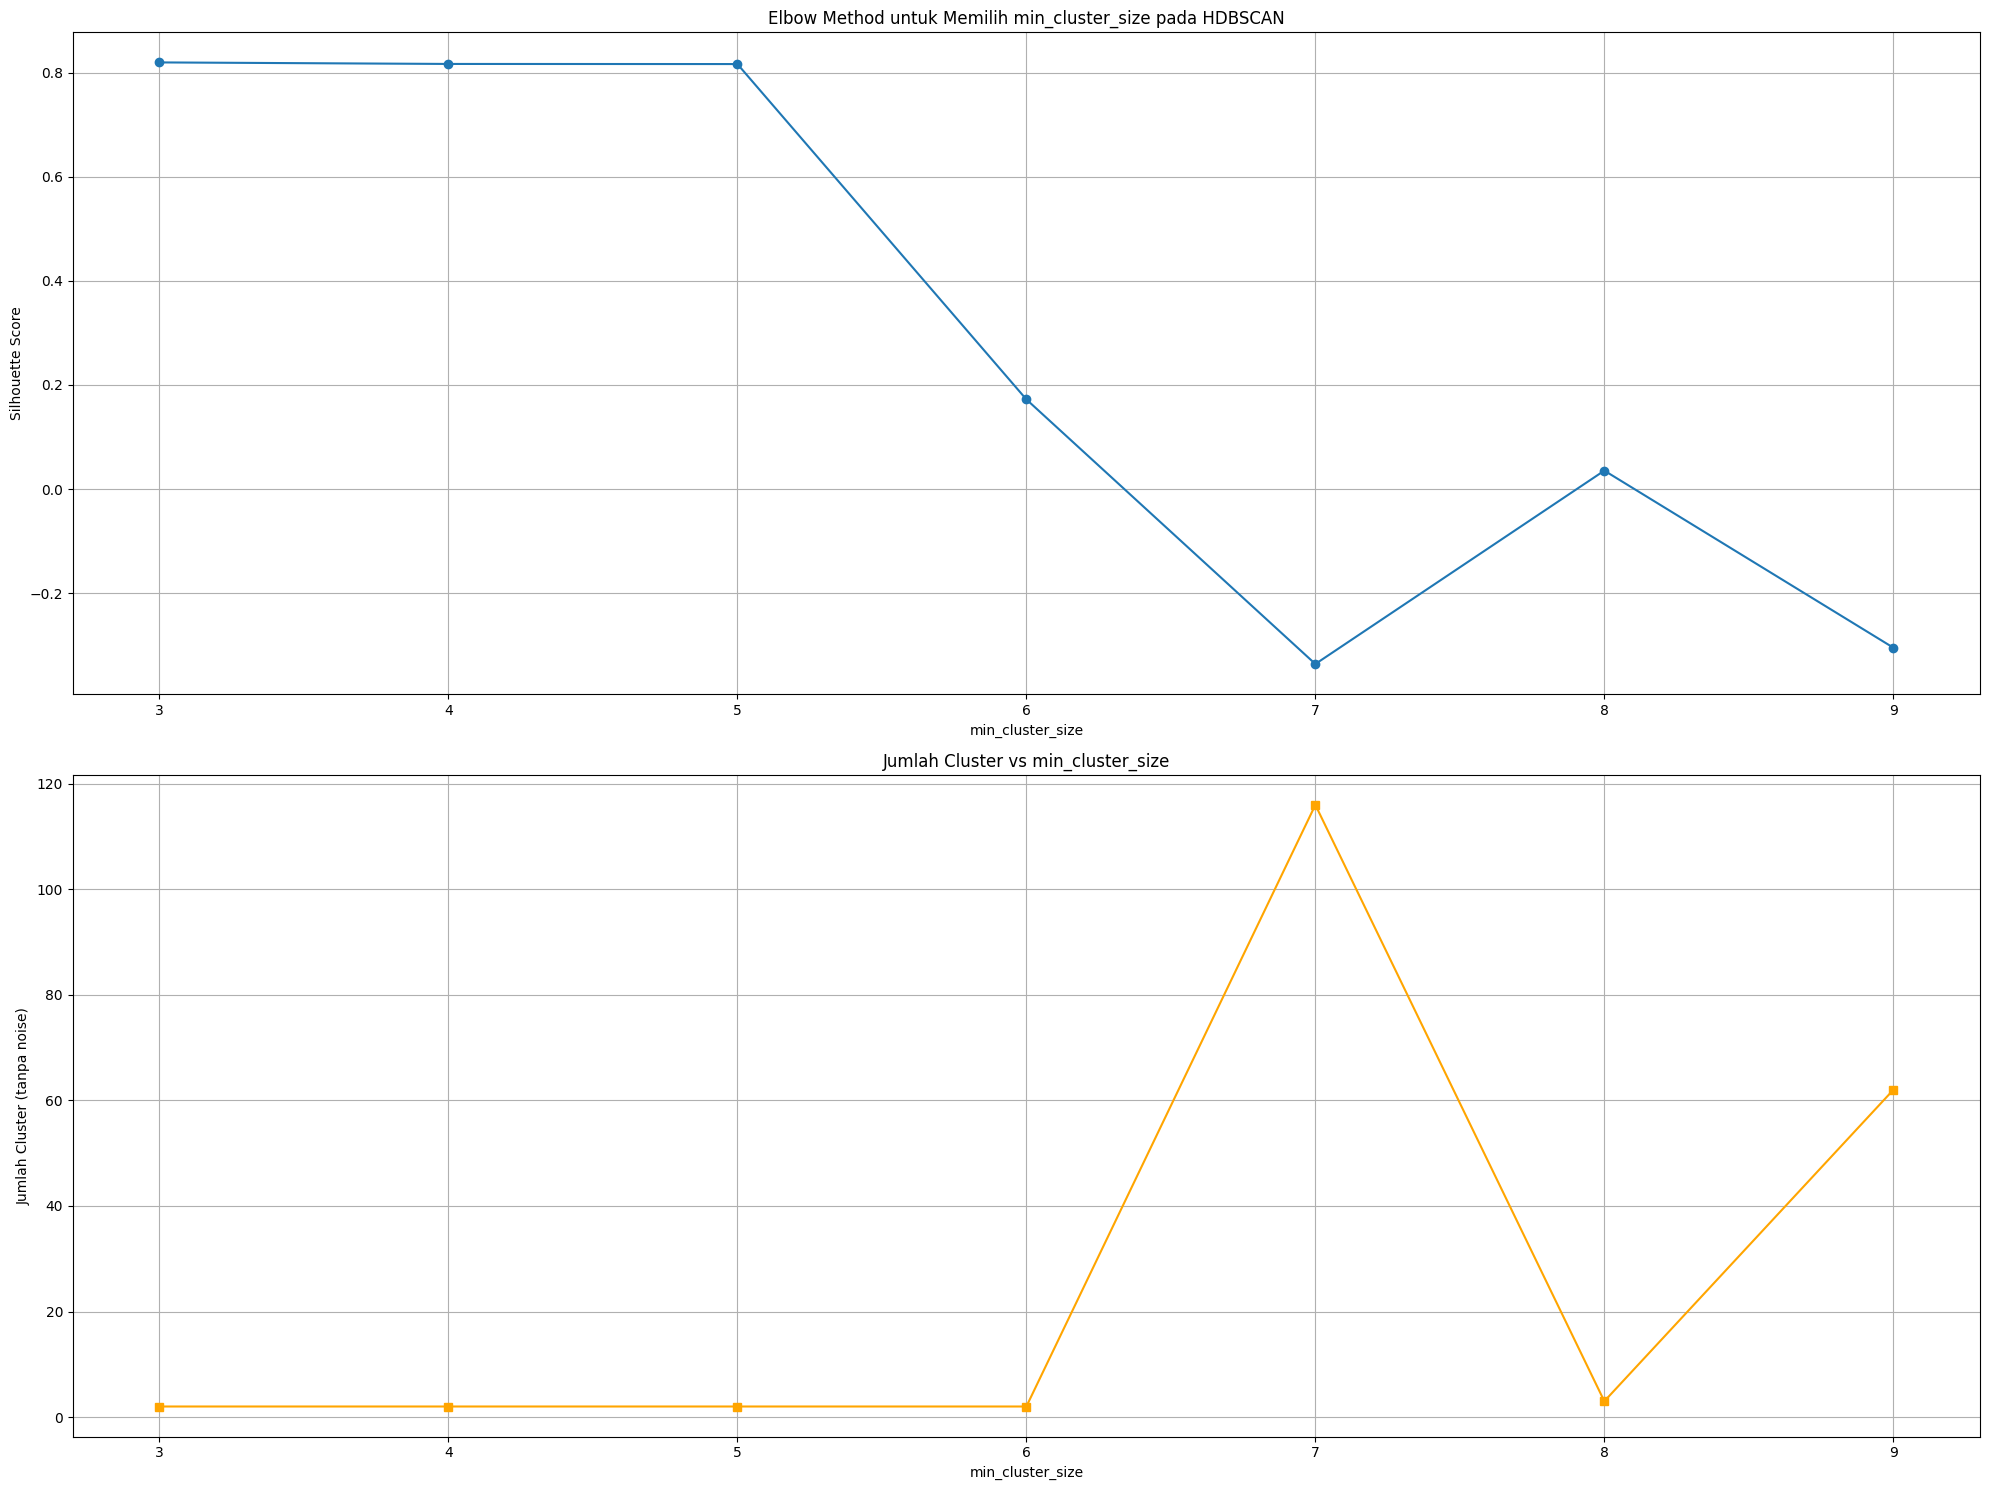

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

axs[0].plot(list(min_cluster_sizes), sil_scores, marker='o')
axs[0].set_xlabel("min_cluster_size")
axs[0].set_ylabel("Silhouette Score")
axs[0].set_title("Elbow Method untuk Memilih min_cluster_size pada HDBSCAN")
axs[0].grid(True)

axs[1].plot(list(min_cluster_sizes), n_clusters_list, marker='s', color='orange')
axs[1].set_xlabel("min_cluster_size")
axs[1].set_ylabel("Jumlah Cluster (tanpa noise)")
axs[1].set_title("Jumlah Cluster vs min_cluster_size")
axs[1].grid(True)

plt.tight_layout()
plt.show()

### **Reduksi Dimensi dengan UMAP**

In [ ]:
reducer = umap.UMAP(n_neighbors=100, n_components=2, metric='euclidean', n_epochs=100, learning_rate=0.1, init='spectral',
                 min_dist=0.1, spread=1.0, low_memory=False, set_op_mix_ratio=1.0, local_connectivity=1,
                 repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, random_state=3,
                 angular_rp_forest=False, target_n_neighbors=-1, transform_seed=3, verbose=False, unique=False)

In [ ]:
data_umap = reducer.fit_transform(data_scaled)

In [ ]:
df_umap = pd.DataFrame(data_umap, columns=['UMAP1', 'UMAP2'])

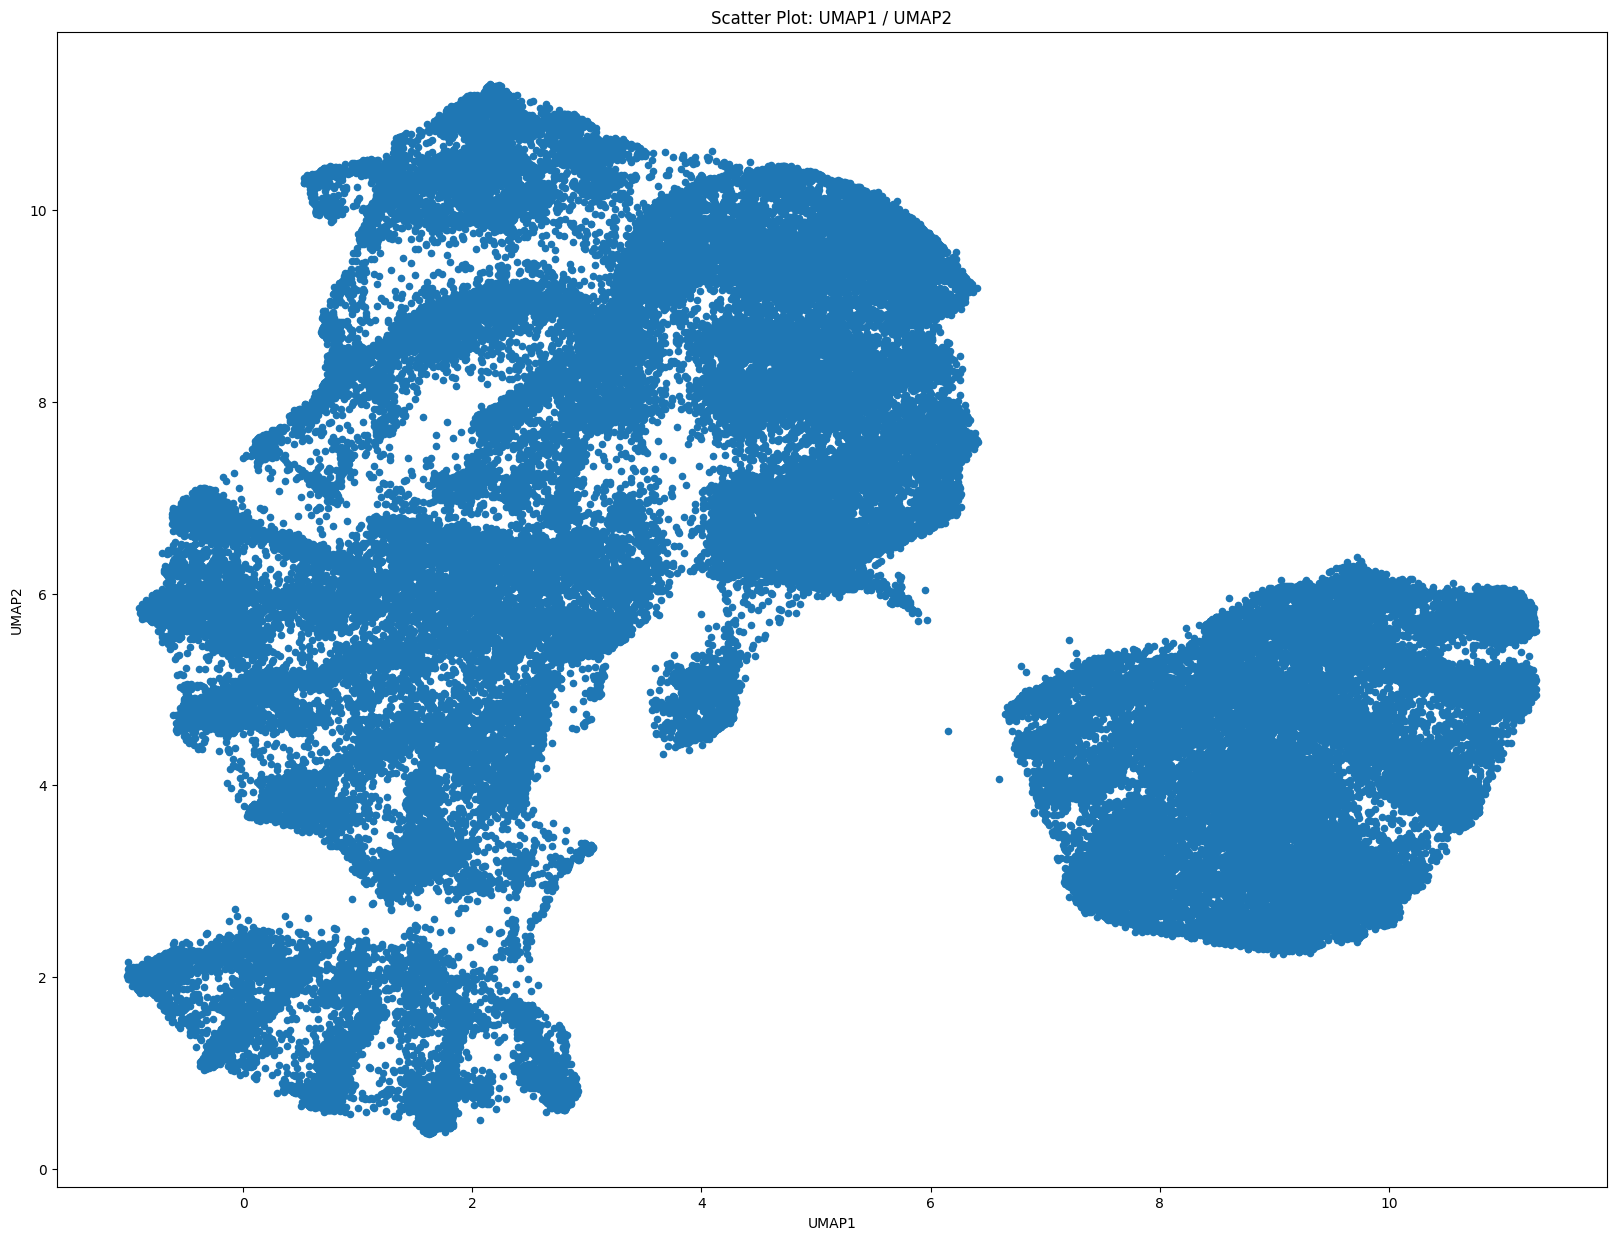

In [ ]:
df_umap.plot(figsize=(20,15), kind='scatter', x='UMAP1', y='UMAP2')
plt.title('Scatter Plot: UMAP1 / UMAP2')
plt.show()

Silhouette Score: 0.5124423


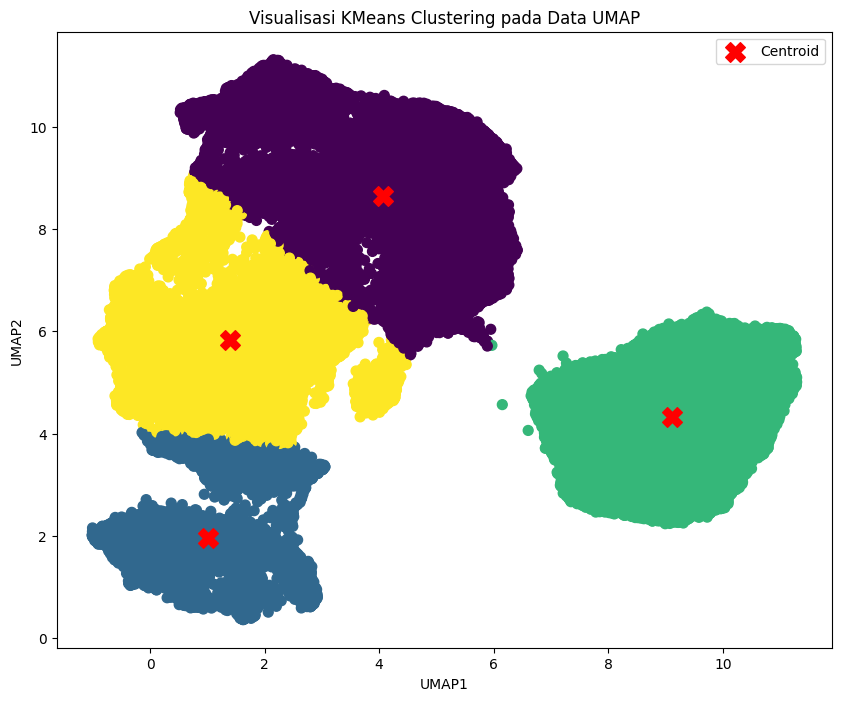

In [ ]:
# Inisialisasi dan fitting KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_umap['cluster'] = kmeans.fit_predict(df_umap[['UMAP1', 'UMAP2']])

# Mendapatkan posisi centroid
centers = kmeans.cluster_centers_

# Menghitung Silhouette Score
score = silhouette_score(df_umap[['UMAP1', 'UMAP2']], df_umap['cluster'])
print("Silhouette Score:", score)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'], c=df_umap['cluster'], cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroid')
plt.title('Visualisasi KMeans Clustering pada Data UMAP')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()
